In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_data_by_path(path):
    # 讀取資料夾中所有CSV檔案
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    # 合併所有CSV檔案
    combined_df = pd.DataFrame()
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df])
    
    # 重置索引
    combined_df.reset_index(drop=True, inplace=True)
    
    # 自動獲取欄位名稱
    columns = combined_df.columns
    x_column = columns[0]
    y_column = columns[1]
    return combined_df

In [3]:
import os
import pandas as pd

def load_last_data_by_path(folder_path):
    # 根据文件名排序，获取最后一个CSV文件
    csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
    if not csv_files:
        return pd.DataFrame()  # 如果没有找到CSV文件，则返回空的DataFrame
    
    # 读取最后一个文件
    last_file_path = os.path.join(folder_path, csv_files[-1])
    df = pd.read_csv(last_file_path)
    #print(last_file_path)
    
    # 重置索引
    df.reset_index(drop=True, inplace=True)
    
    return df

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def calculate_rmse_mae(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2:", r2)

    return mae, rmse, r2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

combined_df = []
# 設置CSV檔案所在的資料夾路徑
n_estimator = 15
for i in range(1, n_estimator+1):
    folder_path = f"records/TCN_FINAL/D_TCN_48_{i}"
    combined_df.append(load_data_by_path(folder_path))
    calculate_rmse_mae(combined_df[i-1]["y_true"], combined_df[i-1]["y_predict"])

RMSE: 28.698852328097384
MAE: 17.40748855909553
R2: 0.9757840504227213
RMSE: 28.51217090232546
MAE: 17.730120782266262
R2: 0.9760980675013363
RMSE: 27.903166269283965
MAE: 17.00880621082317
R2: 0.9771082276448695
RMSE: 28.952428125856873
MAE: 17.60915315416667
R2: 0.9753542278666105
RMSE: 28.848610615867116
MAE: 17.674324918241872
R2: 0.9755306604105017
RMSE: 28.916609527904328
MAE: 17.717155828810977
R2: 0.9754151713518414
RMSE: 28.650094847748
MAE: 17.322230745020324
R2: 0.9758662631675797
RMSE: 28.28994077582987
MAE: 17.173026882164635
R2: 0.9764692092924883
RMSE: 29.13667173714398
MAE: 17.809137725254065
R2: 0.9750395548316941
RMSE: 29.15282325216226
MAE: 17.560339842327235
R2: 0.9750118741996231
RMSE: 28.26365311843042
MAE: 17.10659761534553
R2: 0.9765129196681999
RMSE: 29.535493748214257
MAE: 17.967021452134148
R2: 0.9743515623677002
RMSE: 29.153368057289608
MAE: 17.553457048373986
R2: 0.975010940239564
RMSE: 27.84149311381664
MAE: 17.042088168902442
R2: 0.9772093091918901
RMSE: 

In [6]:
y_pred_avg = (
    sum([single["y_predict"] for single in combined_df])/n_estimator
)
#y_pred_avg = combined_df[0]["y_predict"]

calculate_rmse_mae(combined_df[0]["y_true"], y_pred_avg)

RMSE: 27.423557466157423
MAE: 16.160150001310978
R2: 0.9778884071615795


(16.160150001310978, 27.423557466157423, 0.9778884071615795)

<Figure size 1600x1200 with 0 Axes>

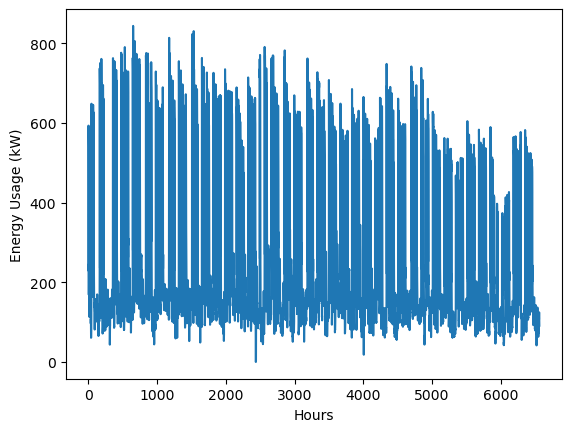

<Figure size 1600x1200 with 0 Axes>

In [11]:
plt.plot((combined_df[0]["y_true"]))
plt.xlabel("Hours")  # X轴标签
plt.ylabel("Energy Usage (kW)")  # Y轴标签
plt.figure(figsize=(16, 12))


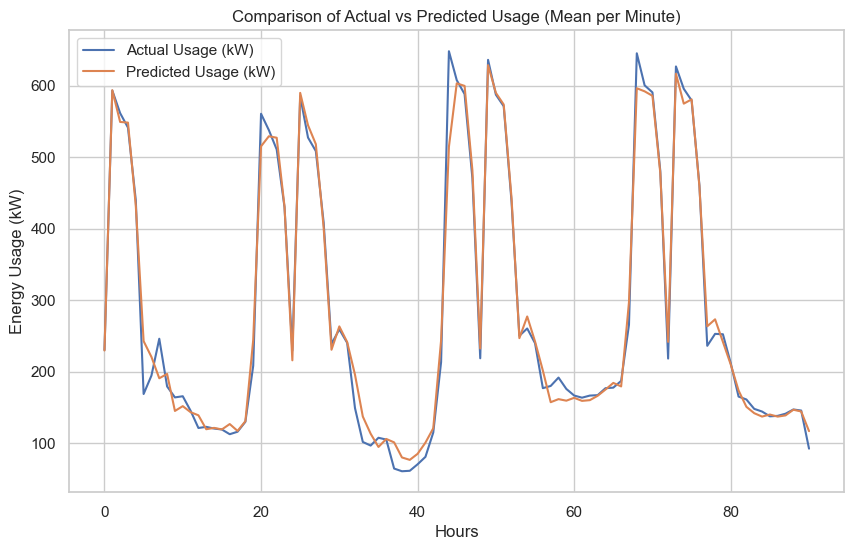

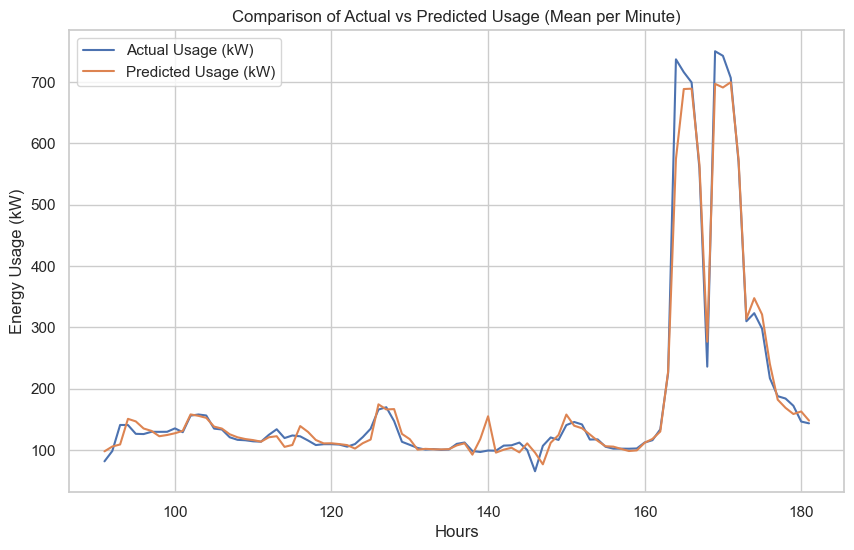

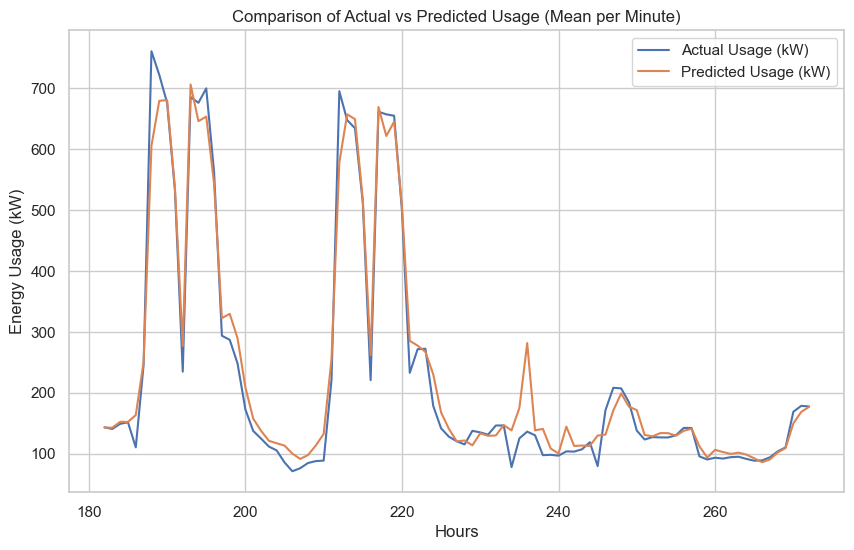

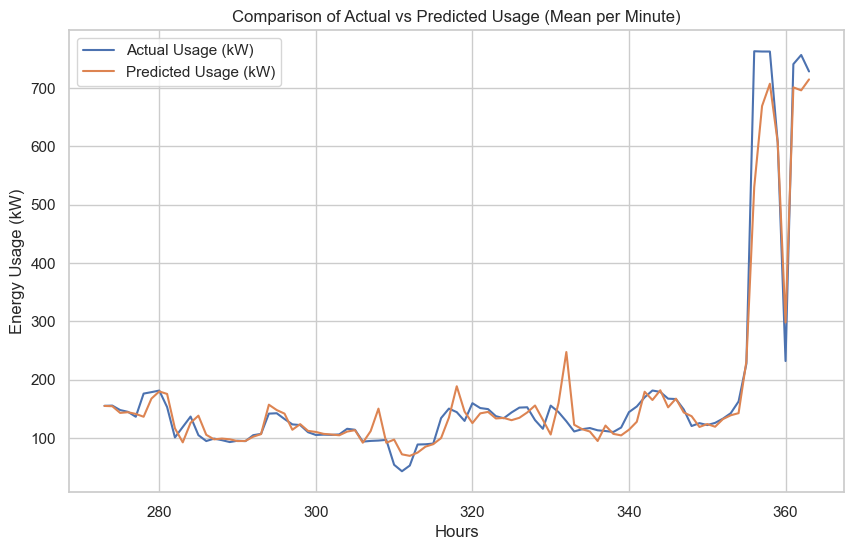

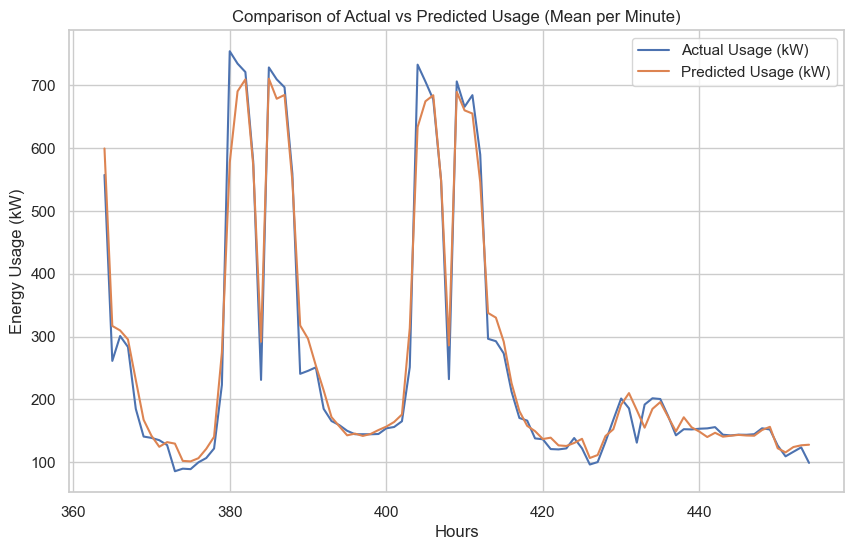

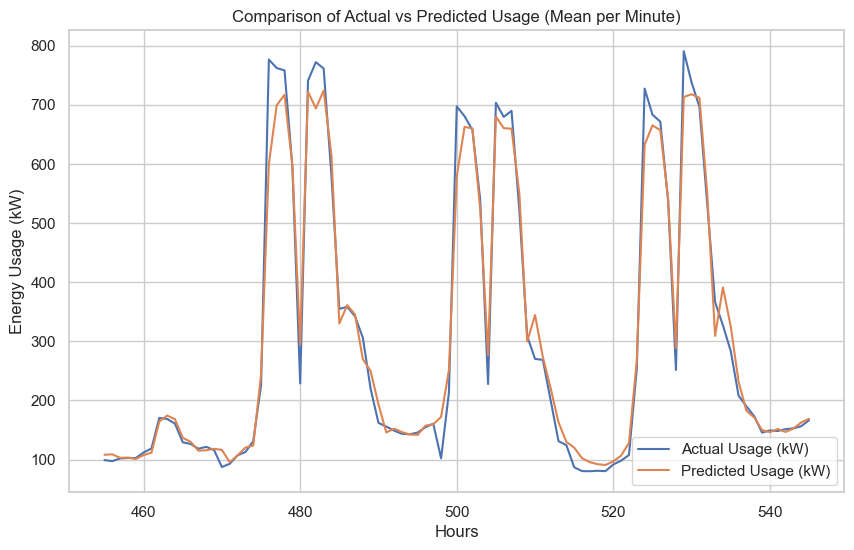

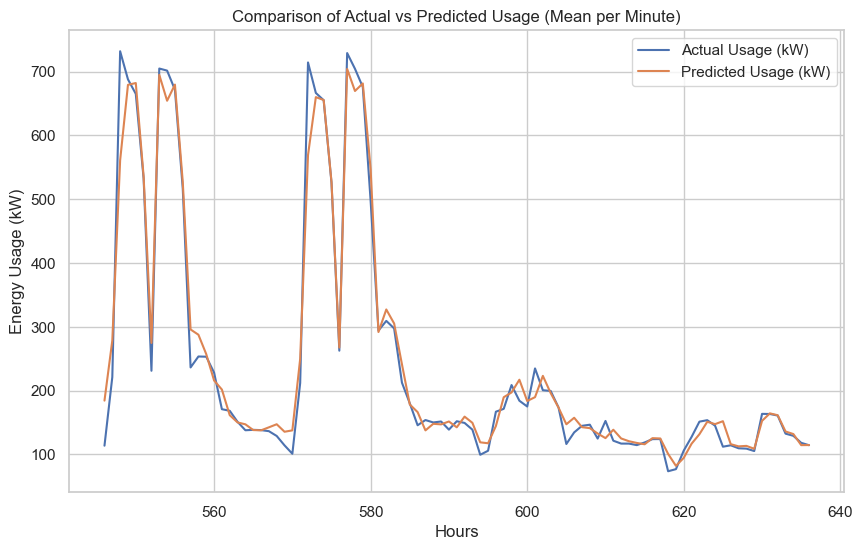

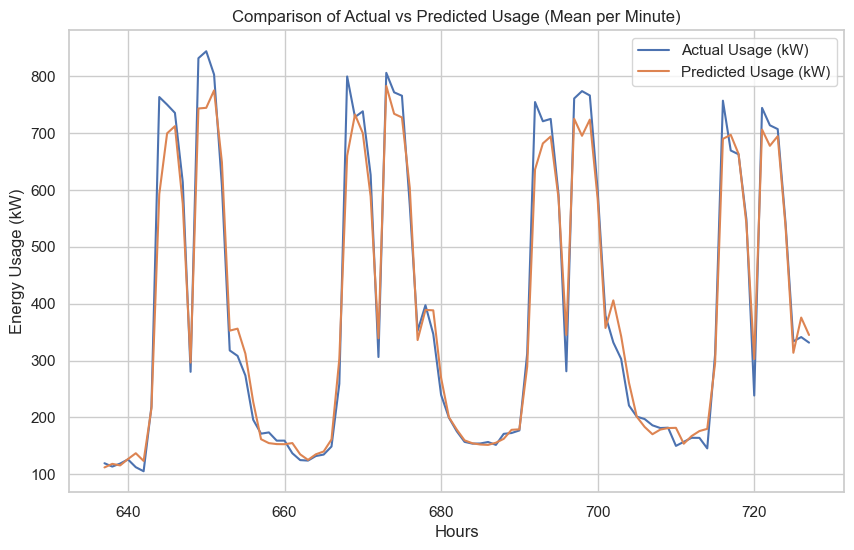

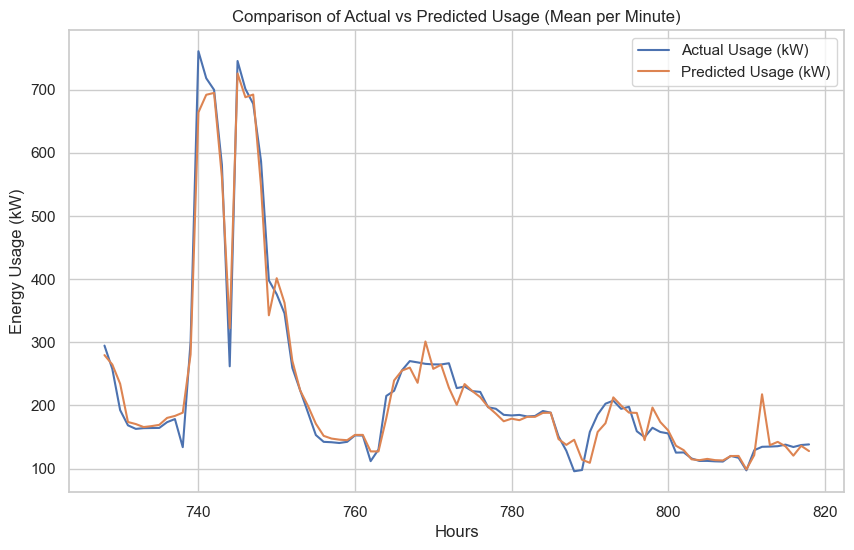

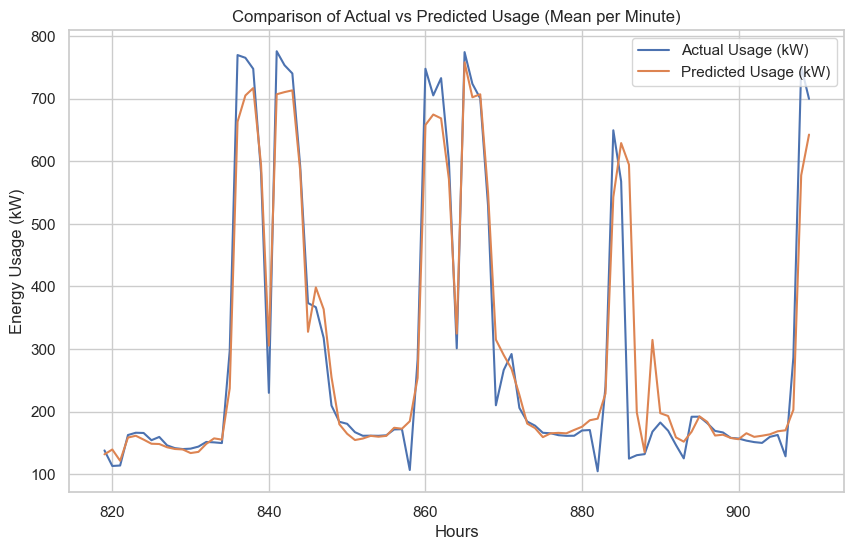

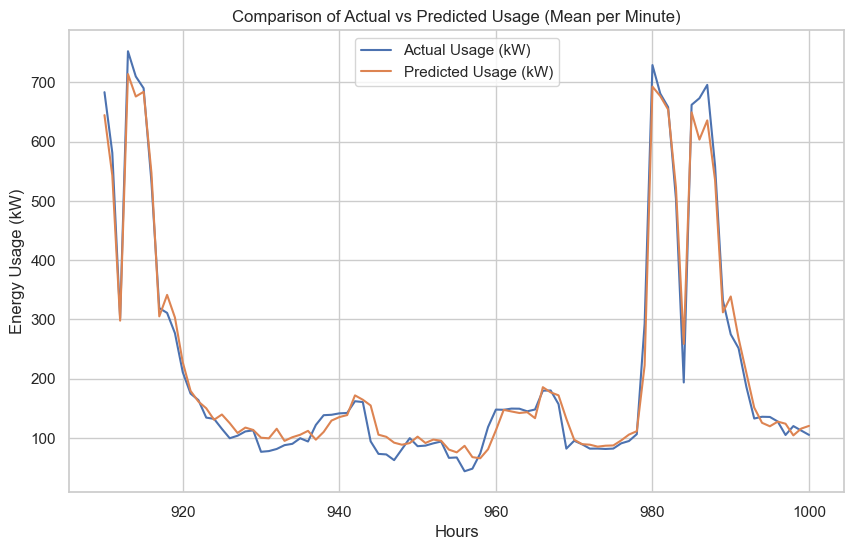

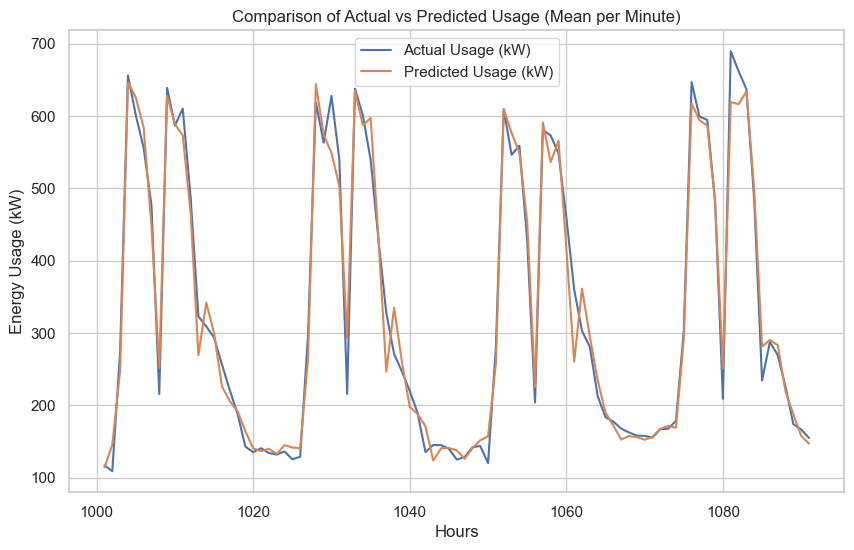

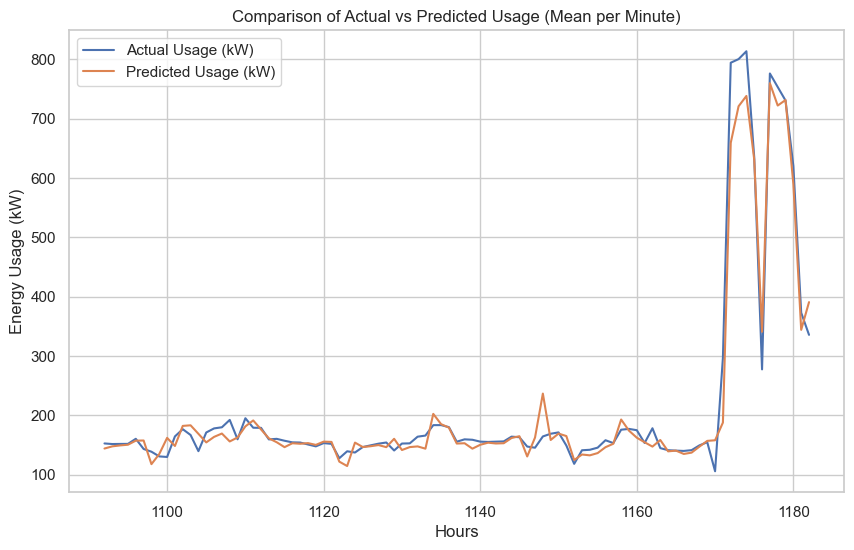

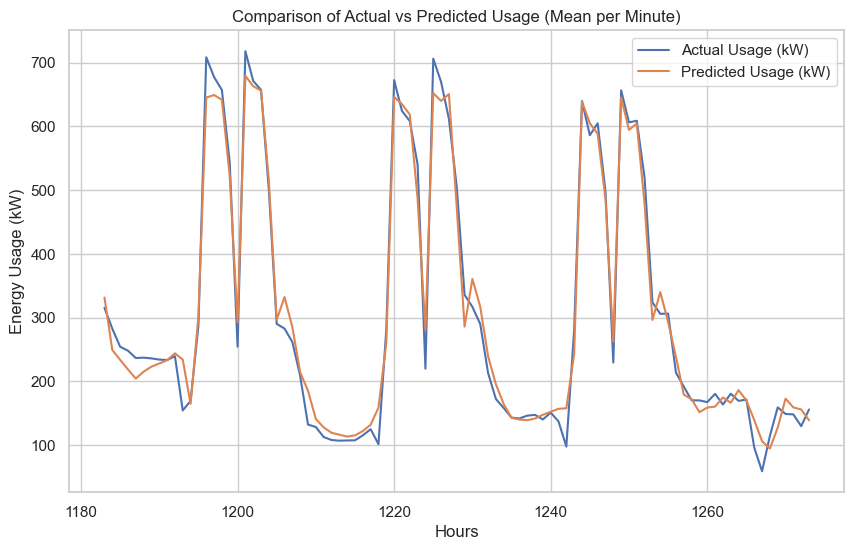

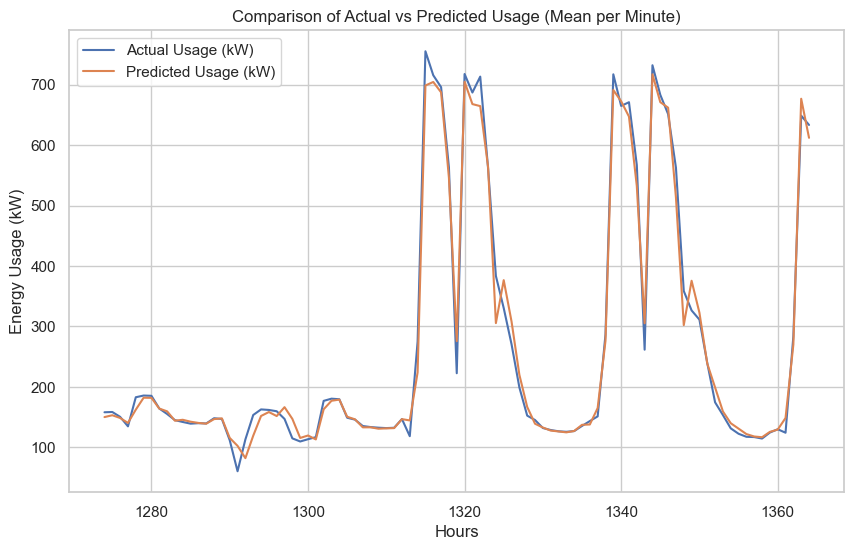

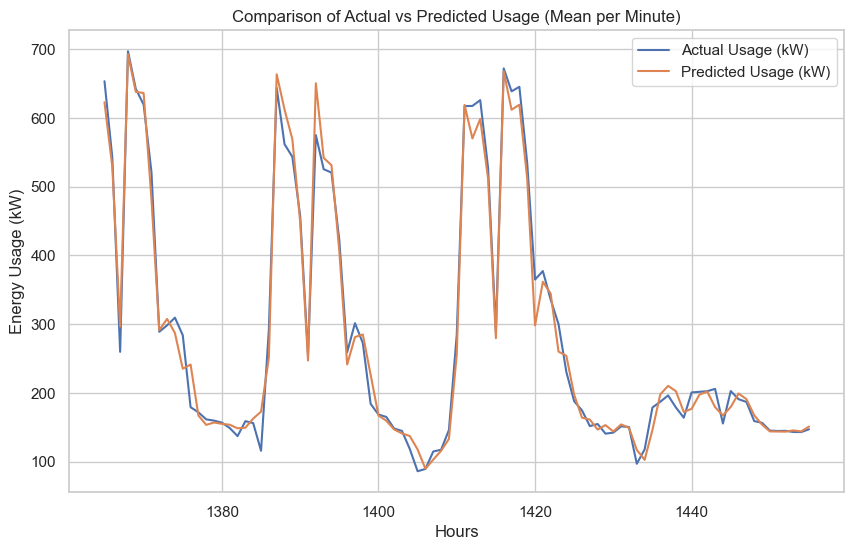

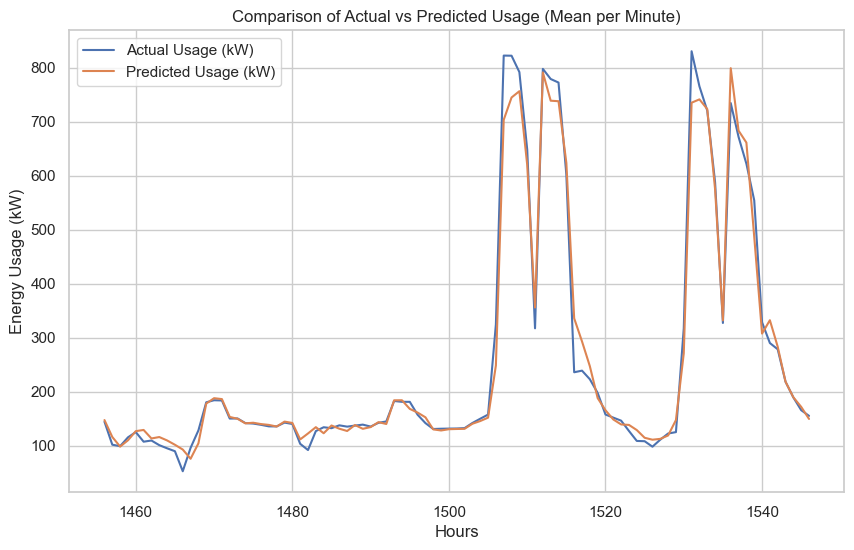

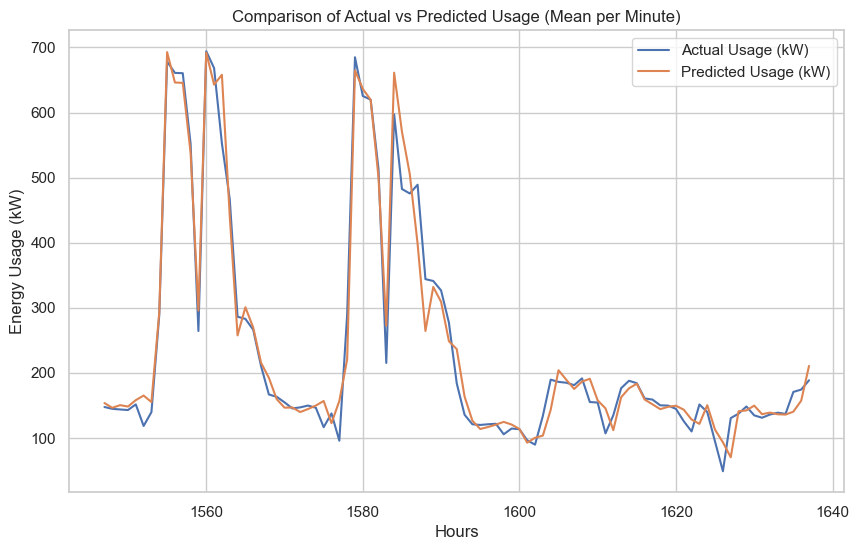

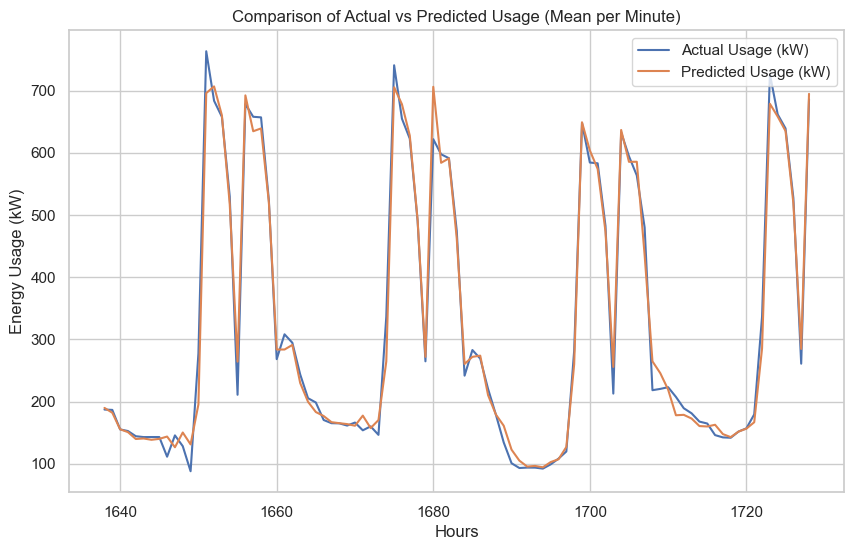

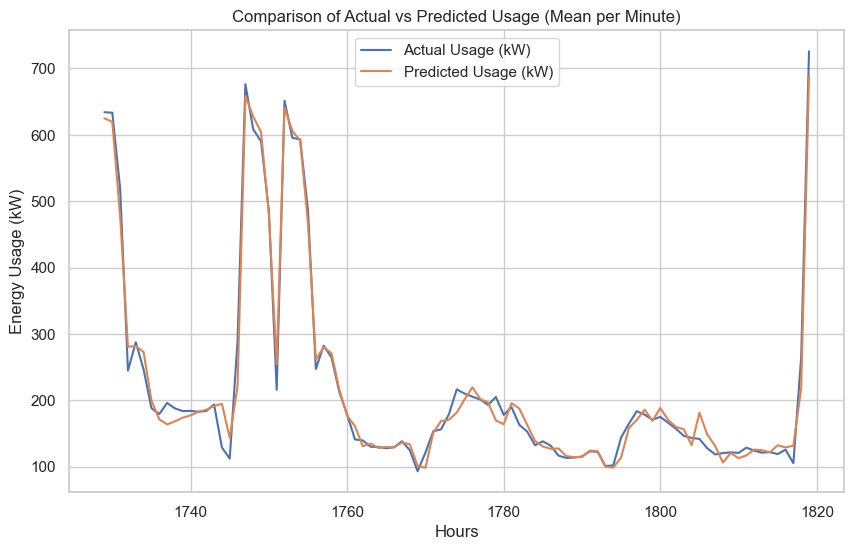

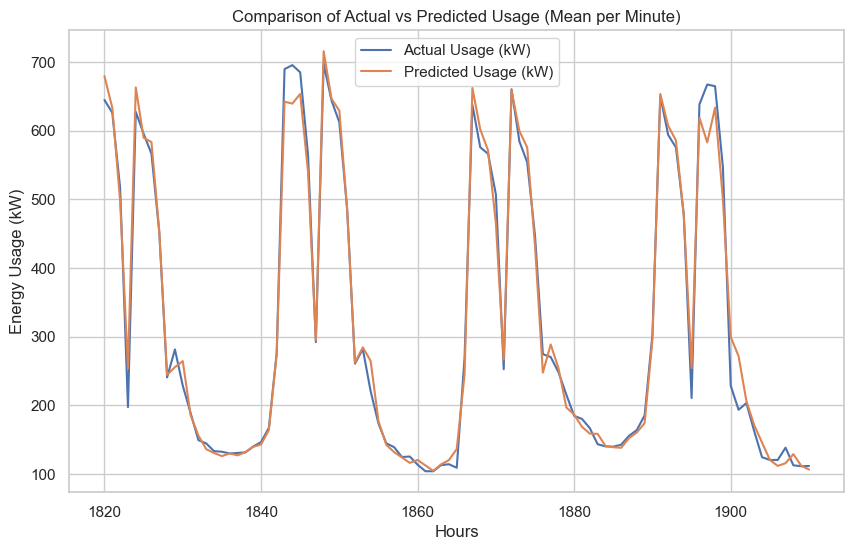

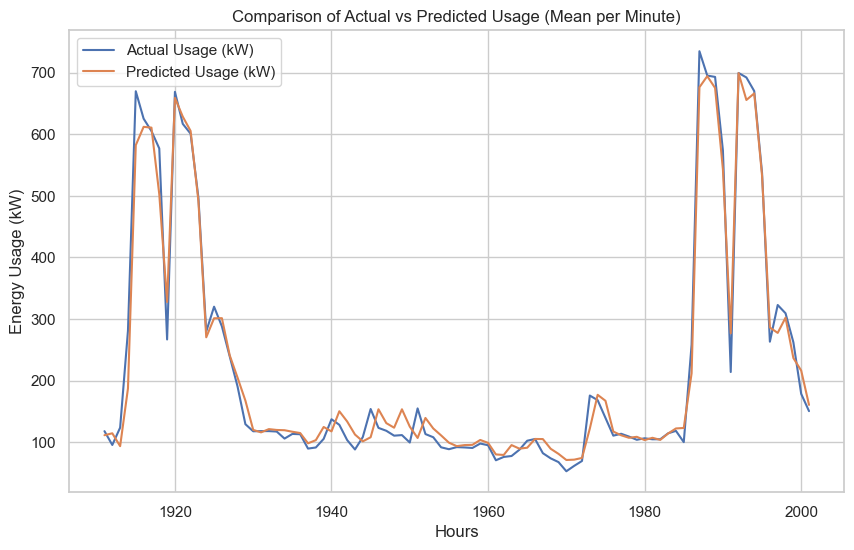

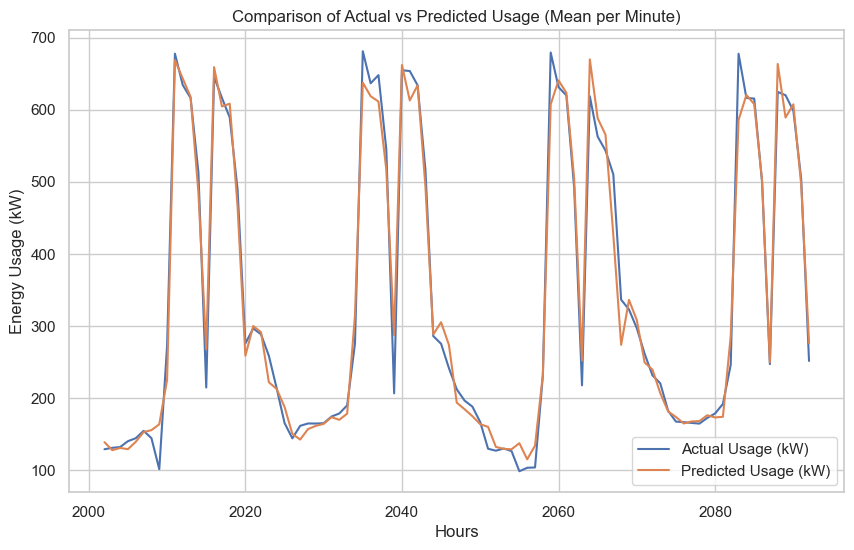

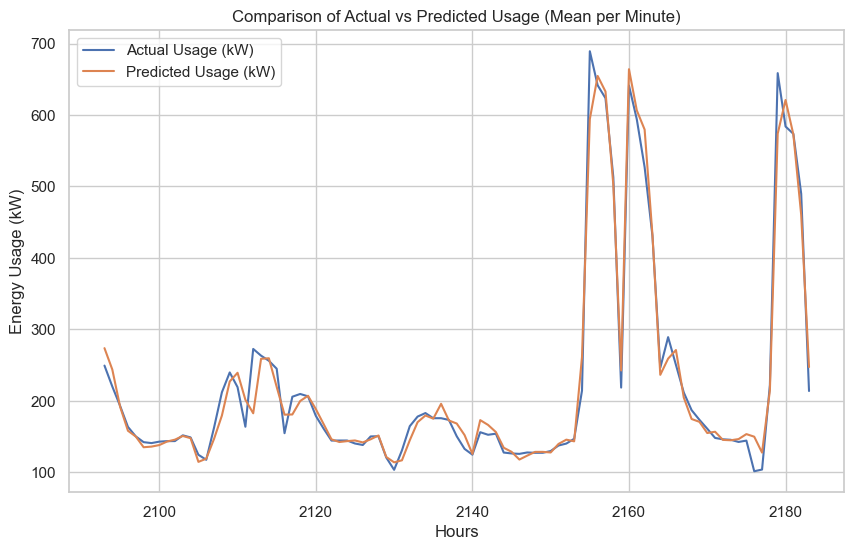

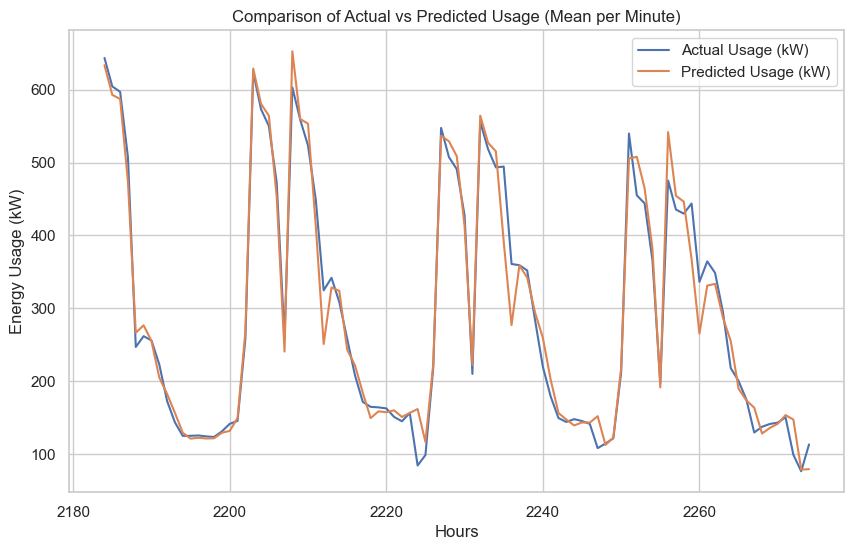

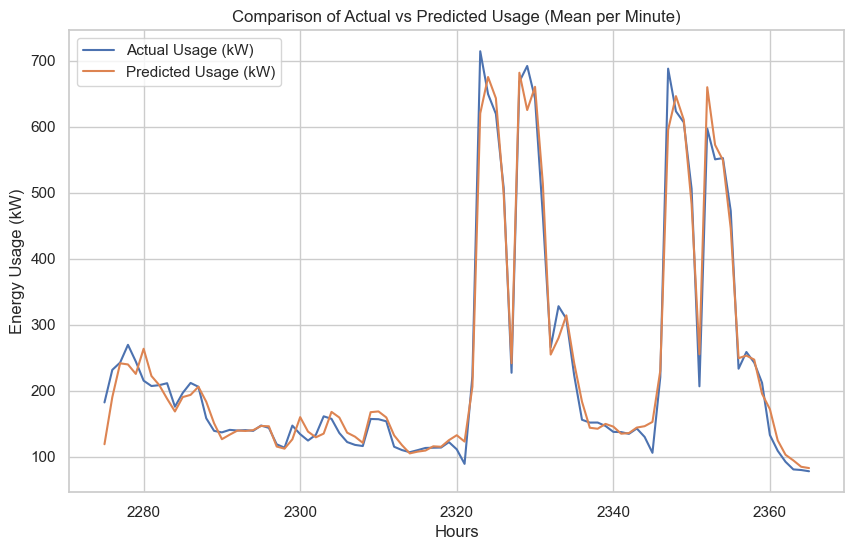

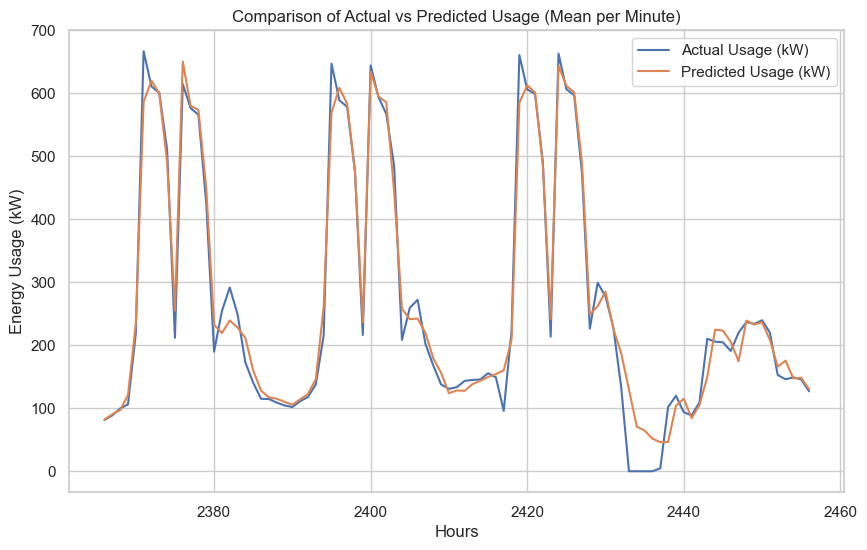

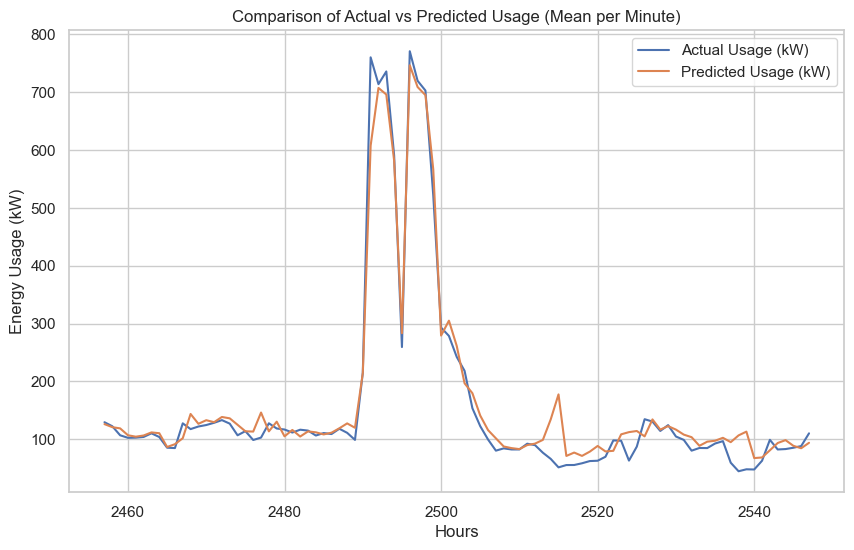

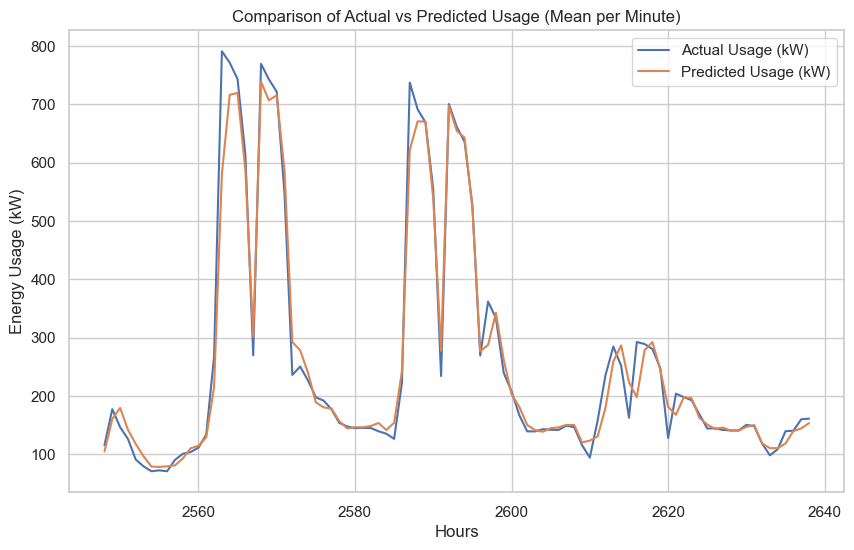

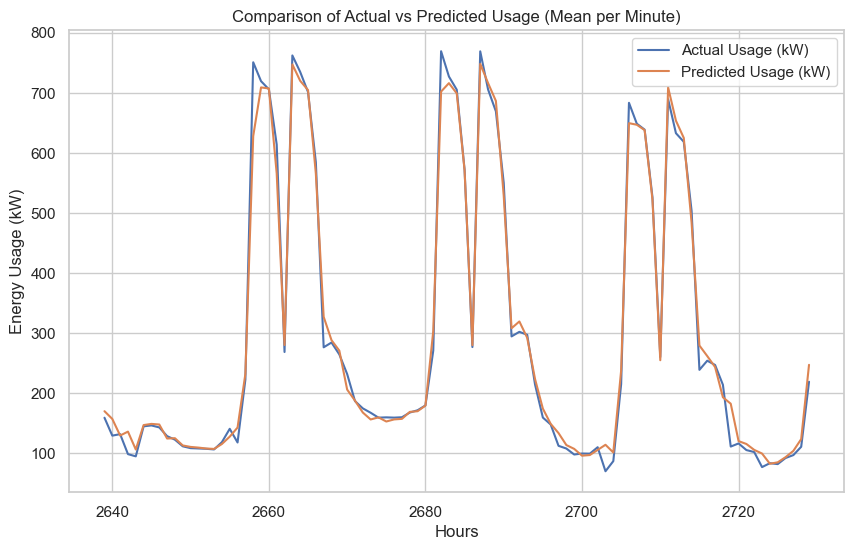

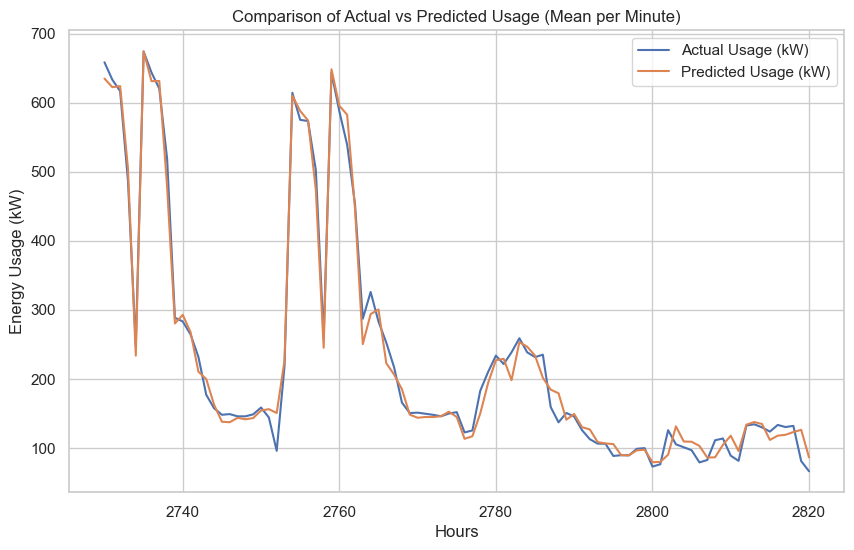

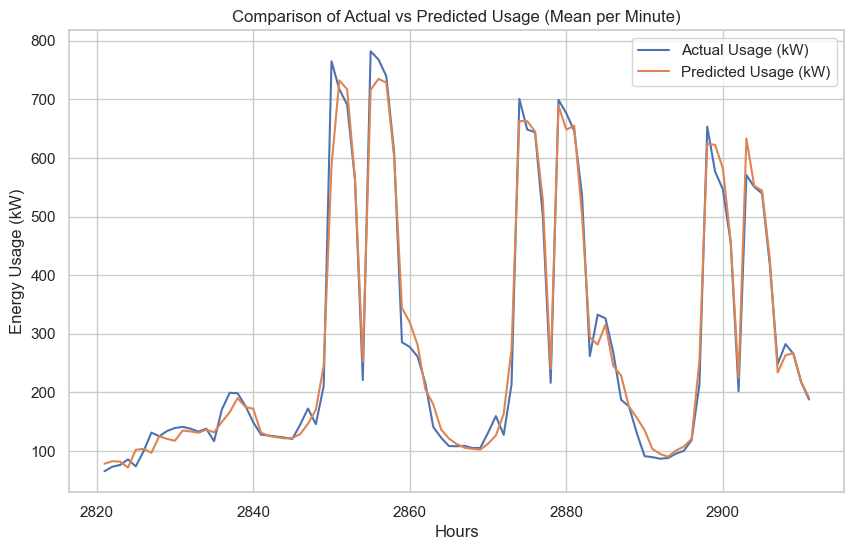

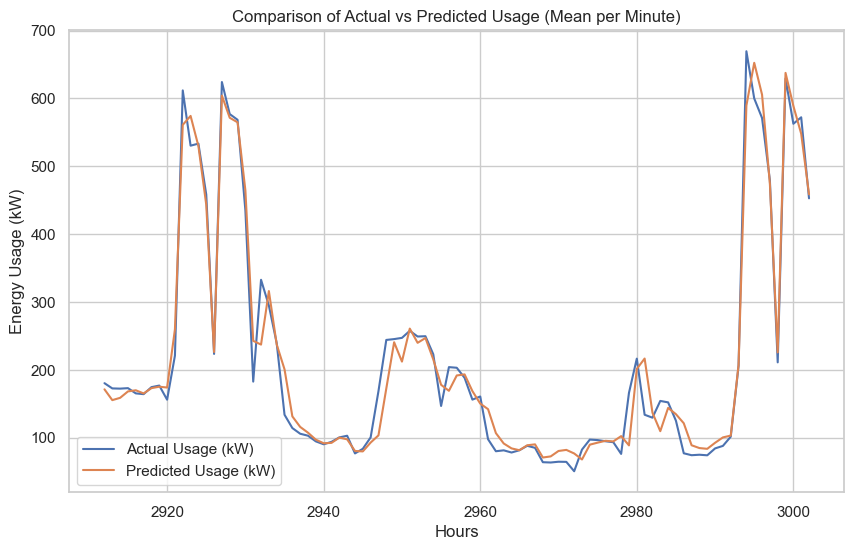

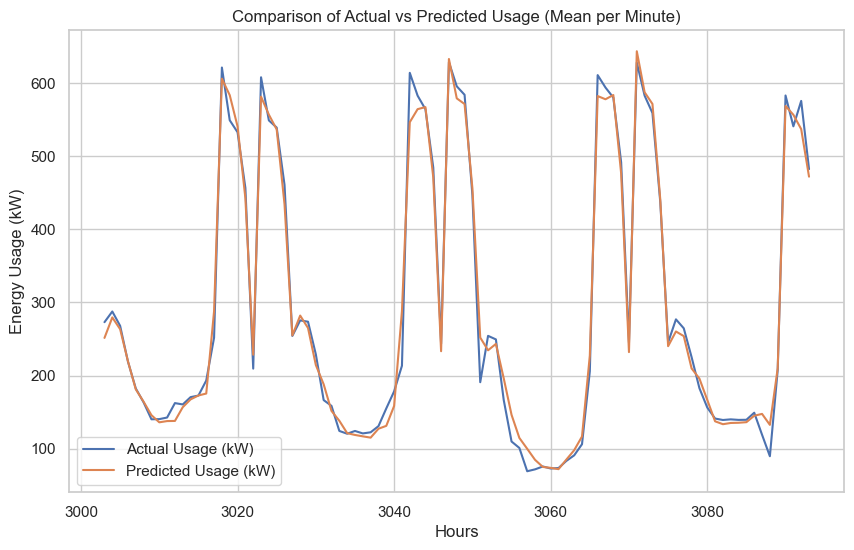

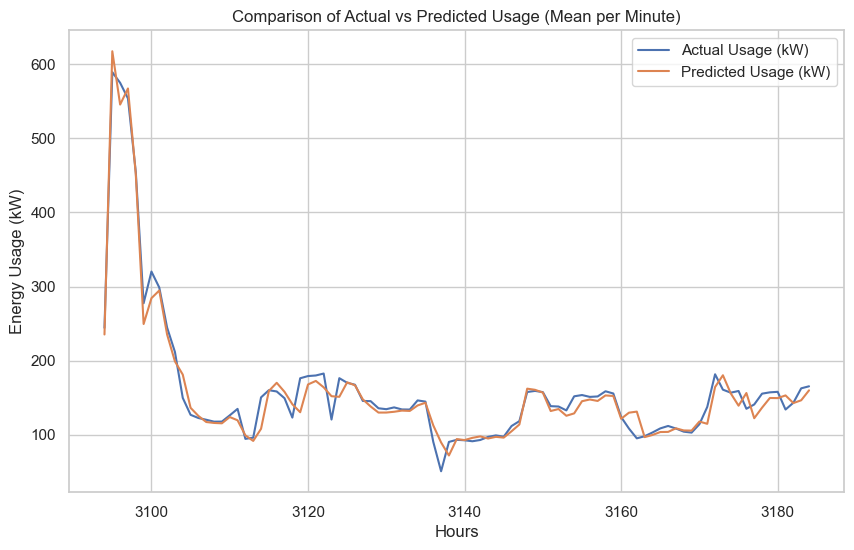

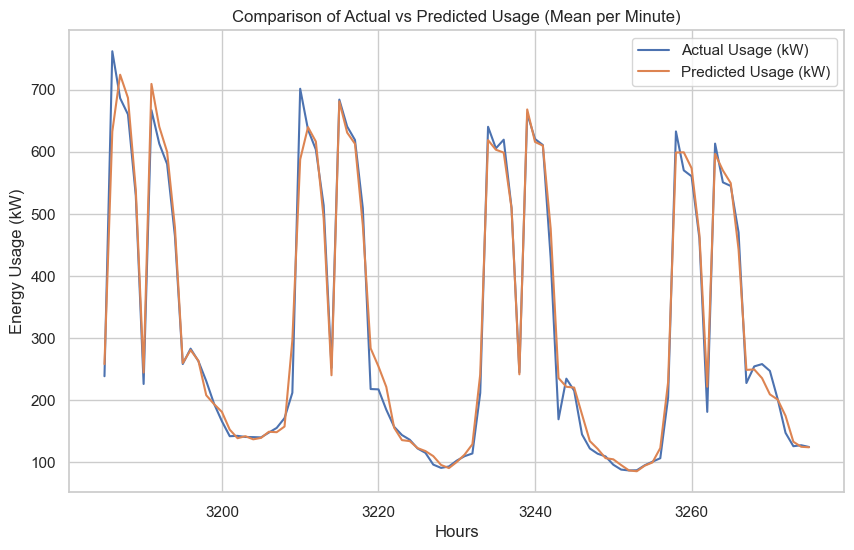

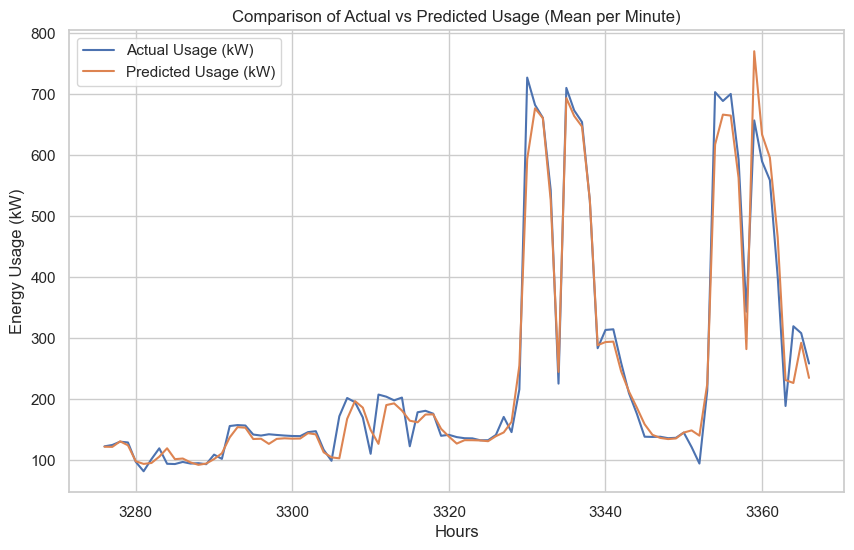

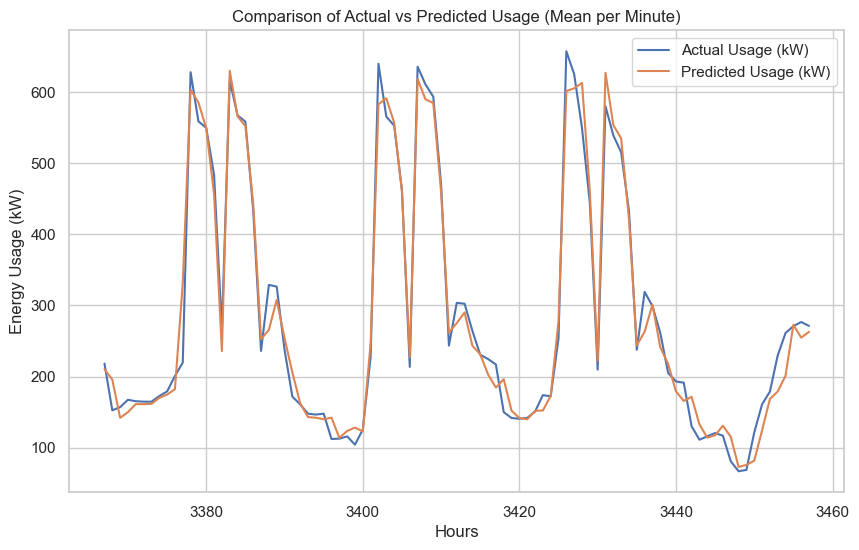

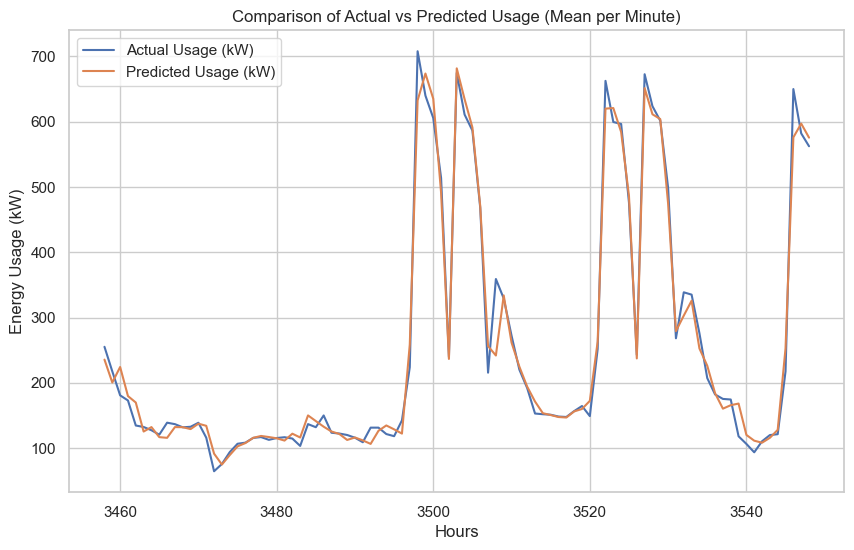

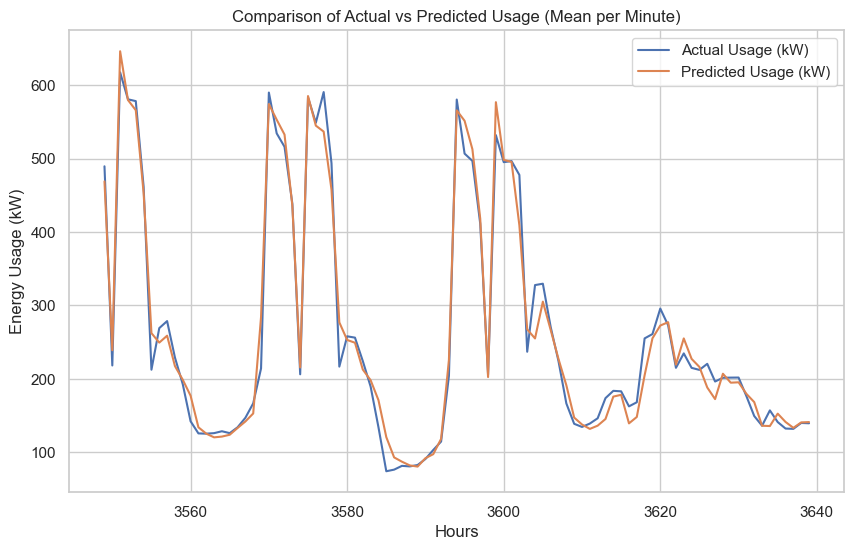

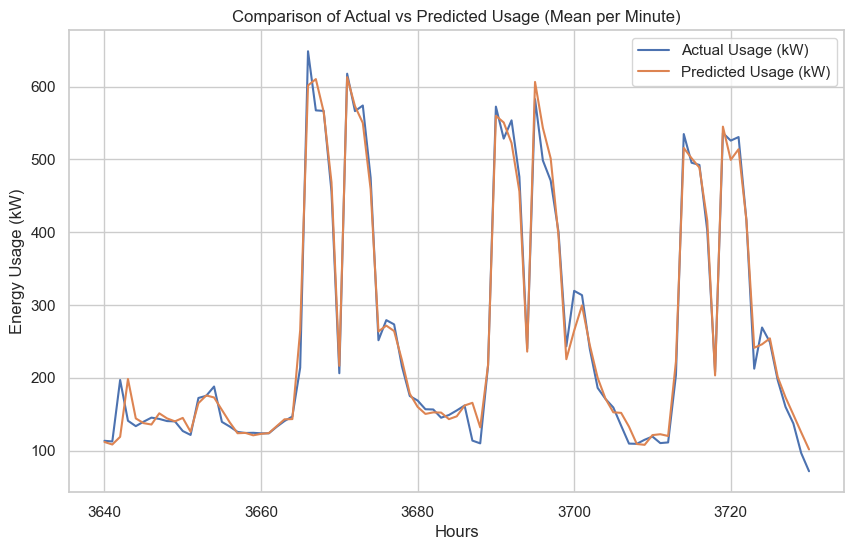

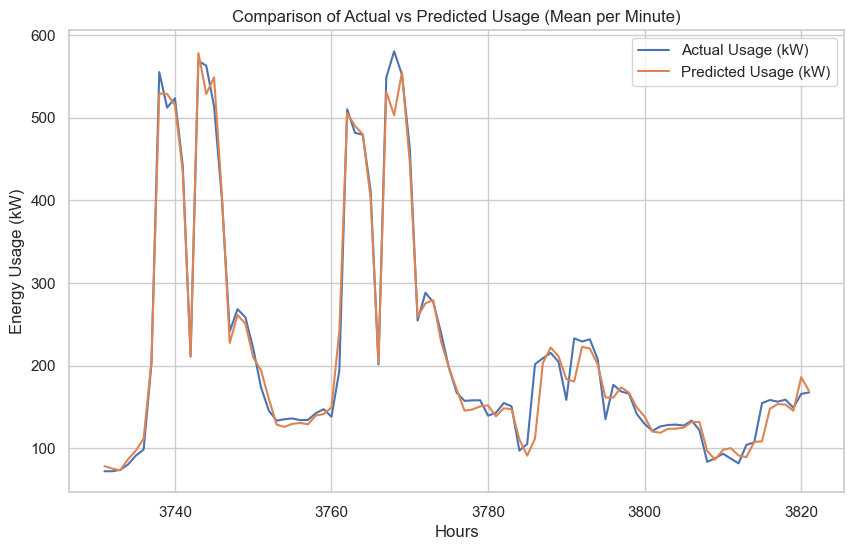

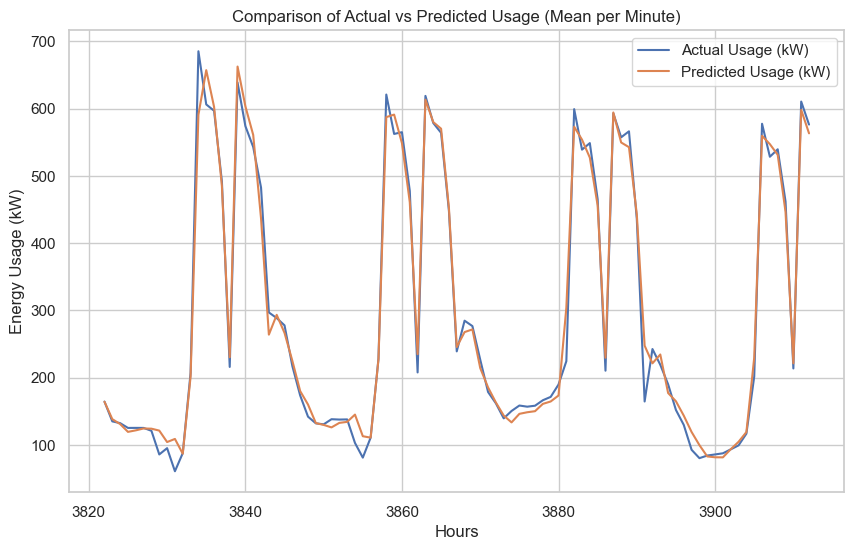

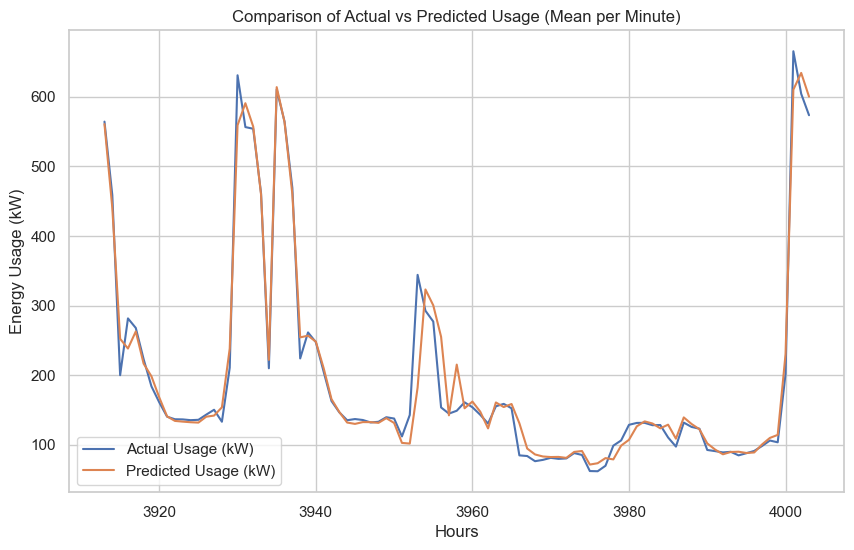

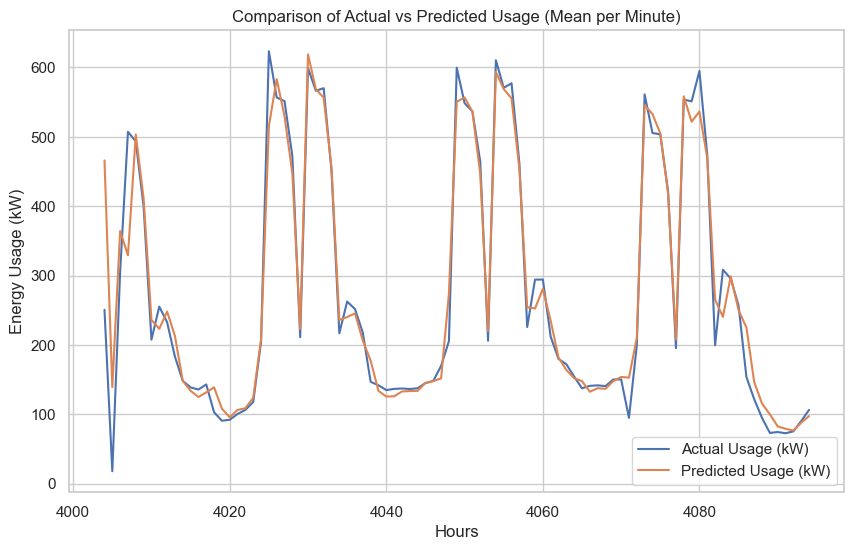

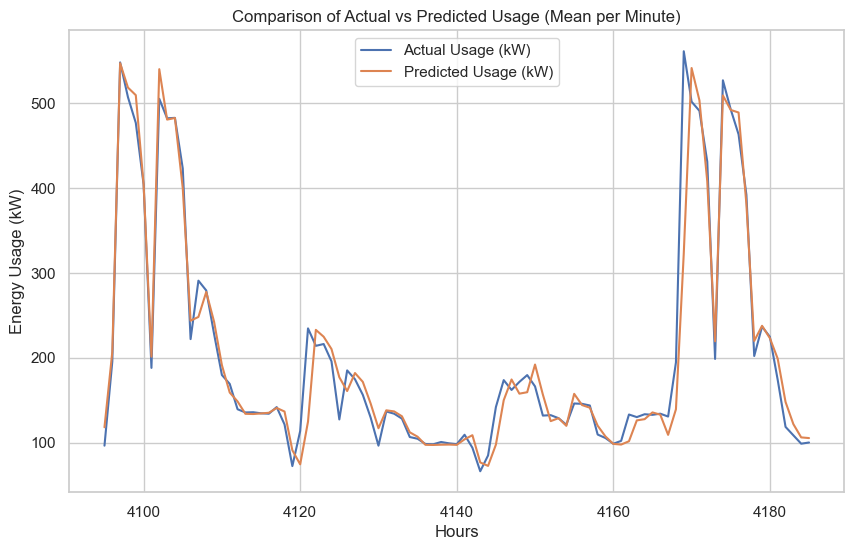

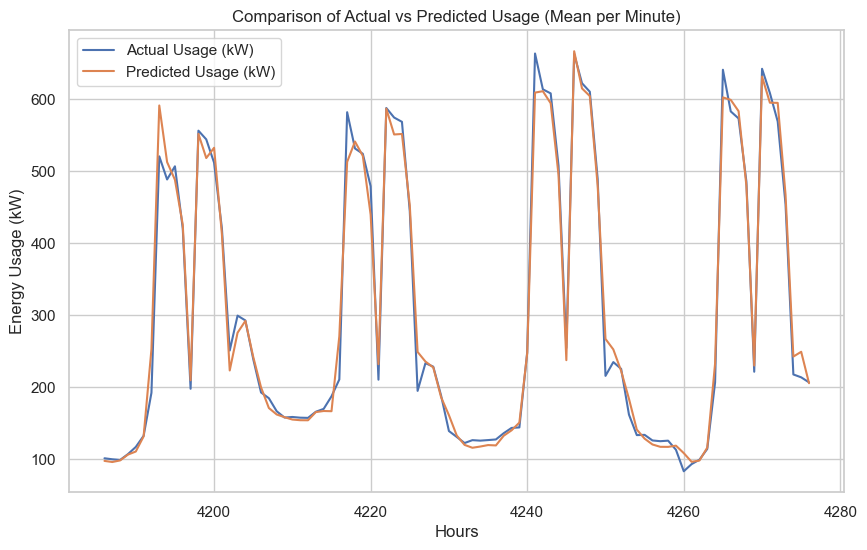

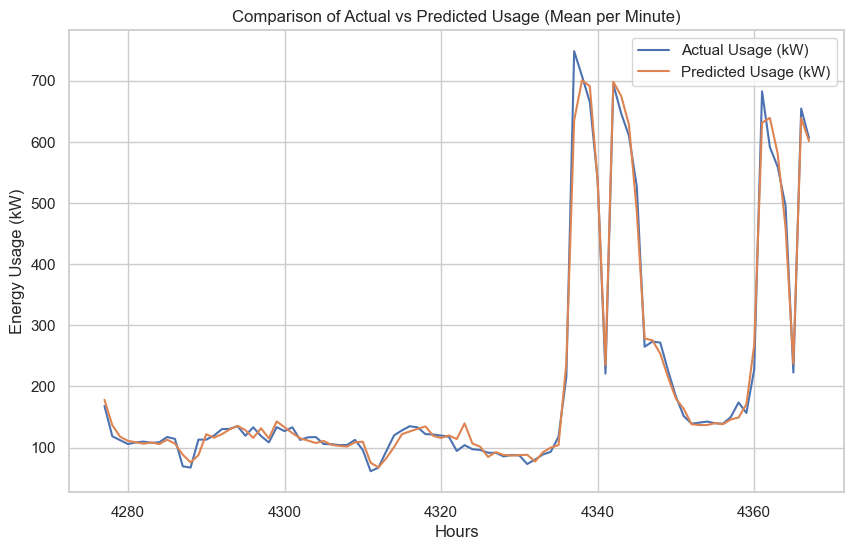

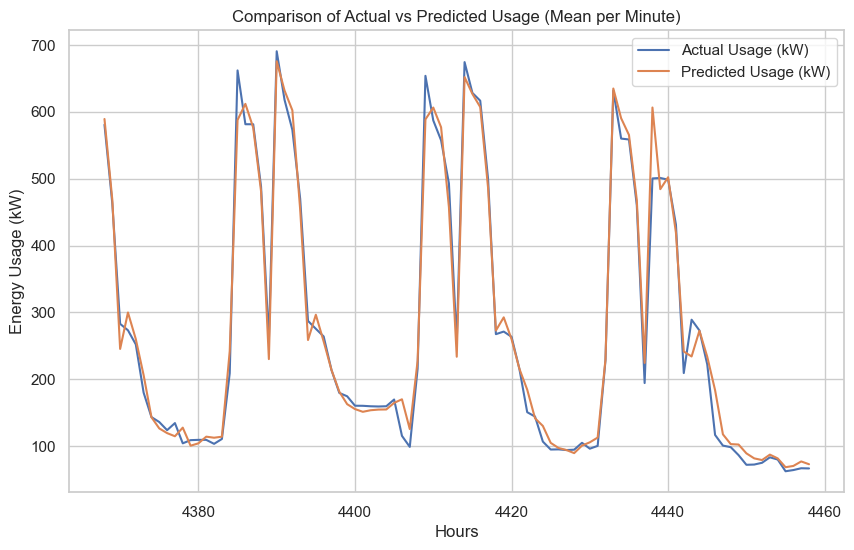

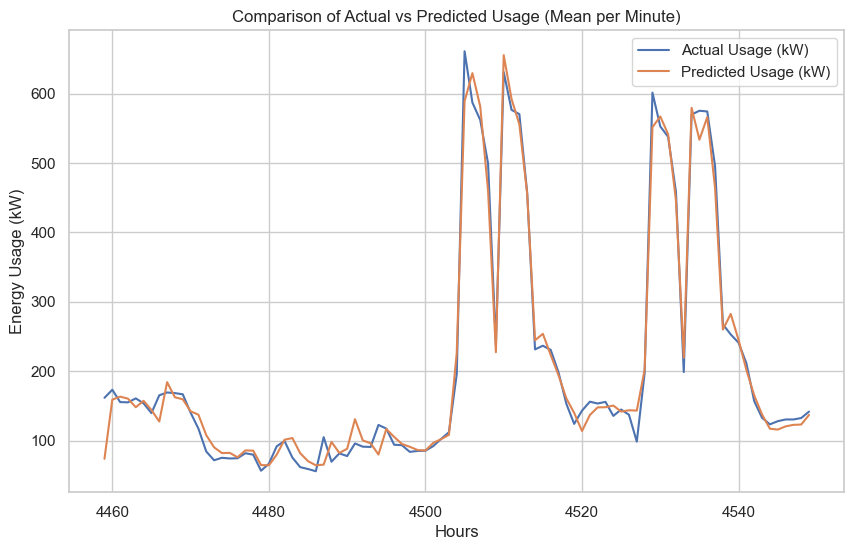

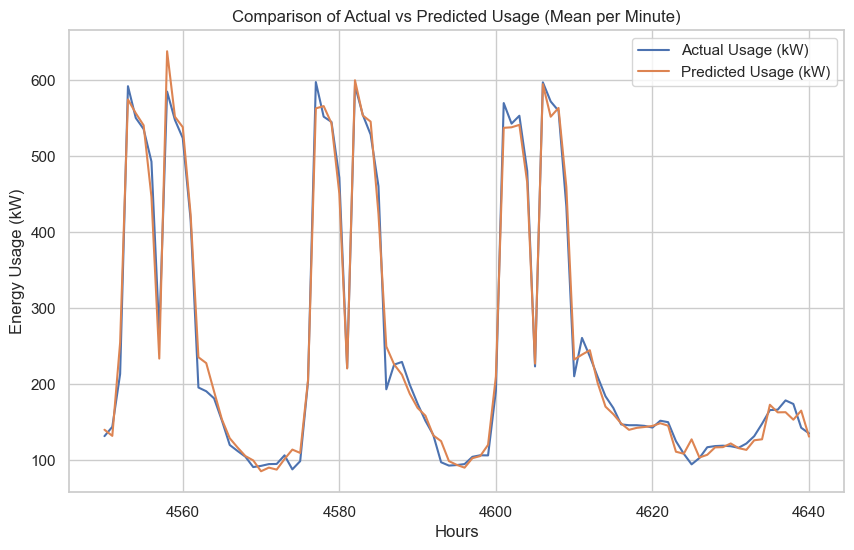

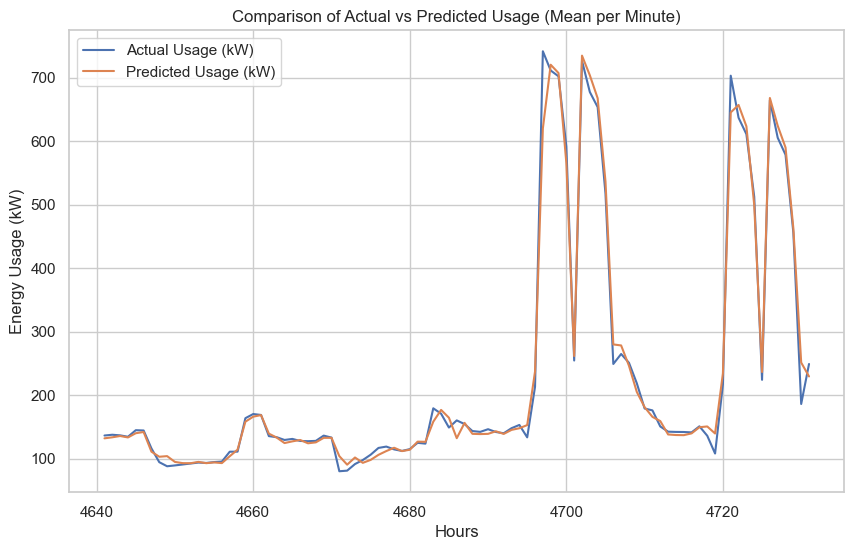

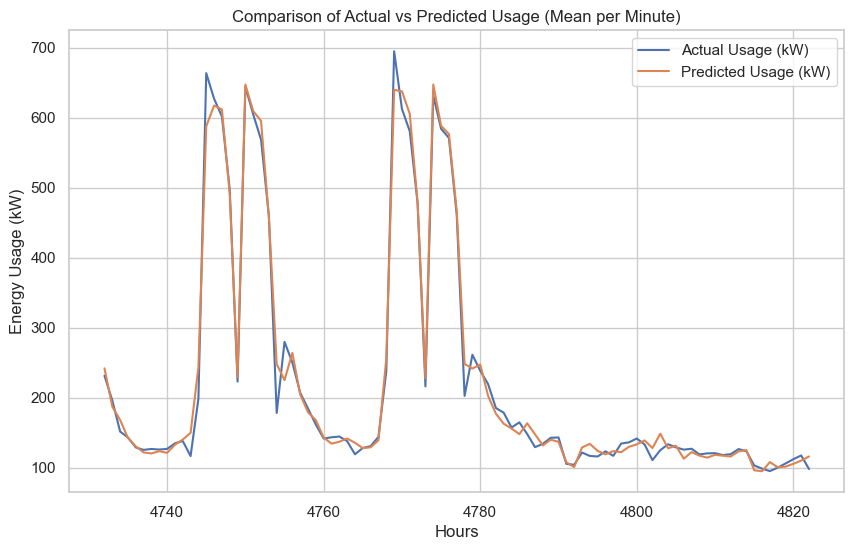

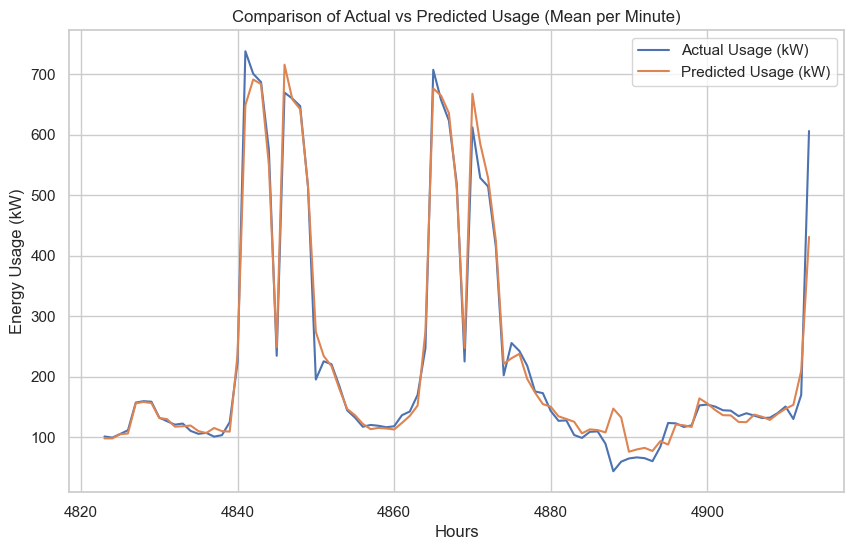

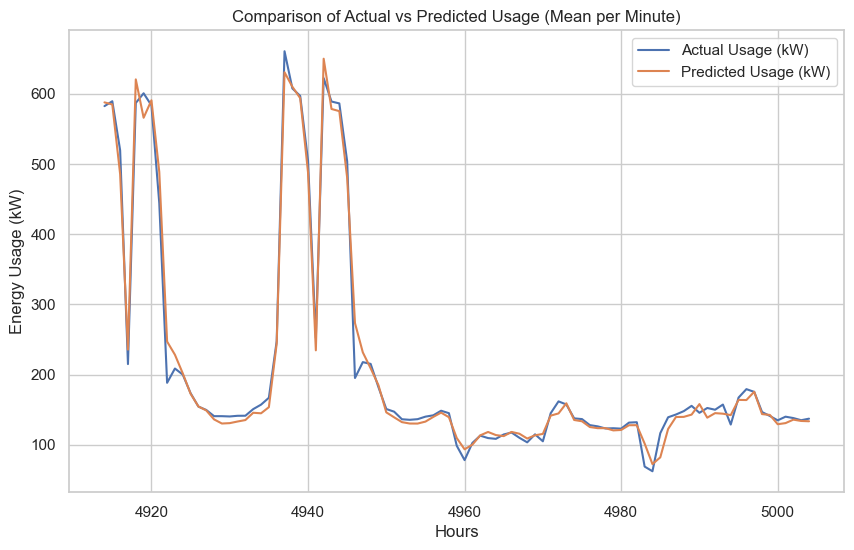

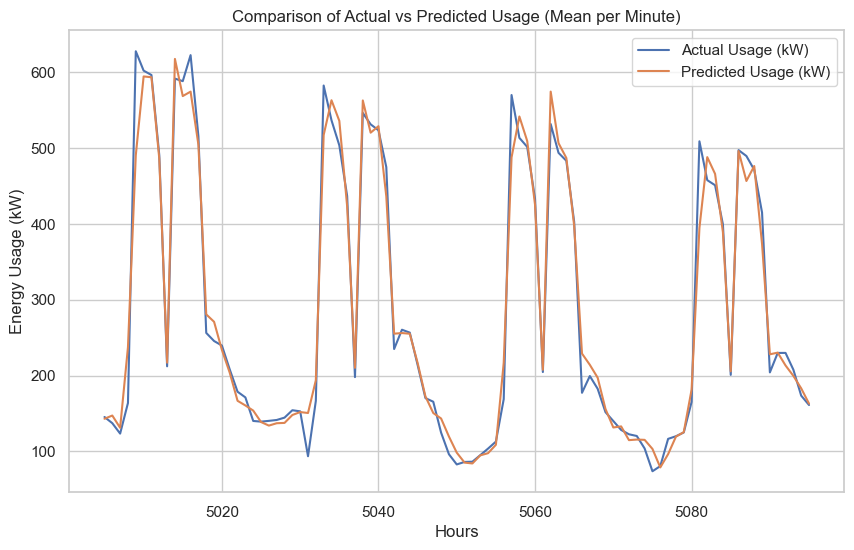

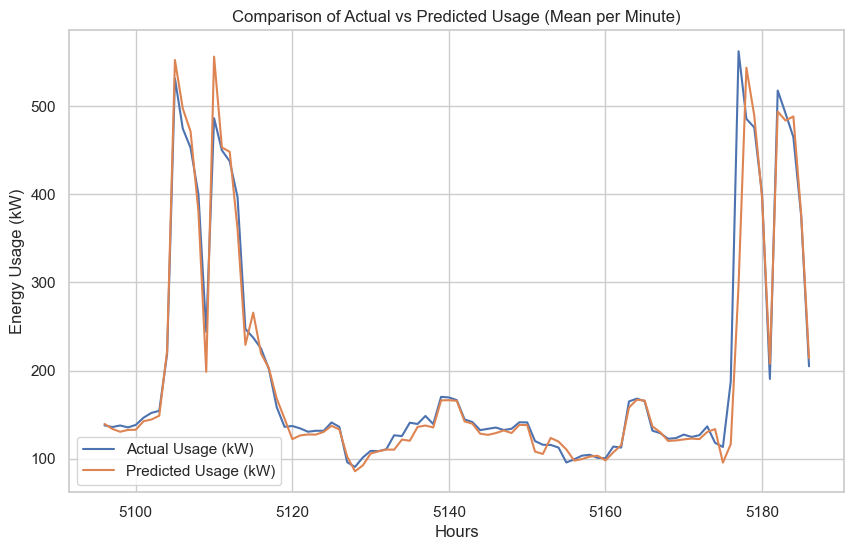

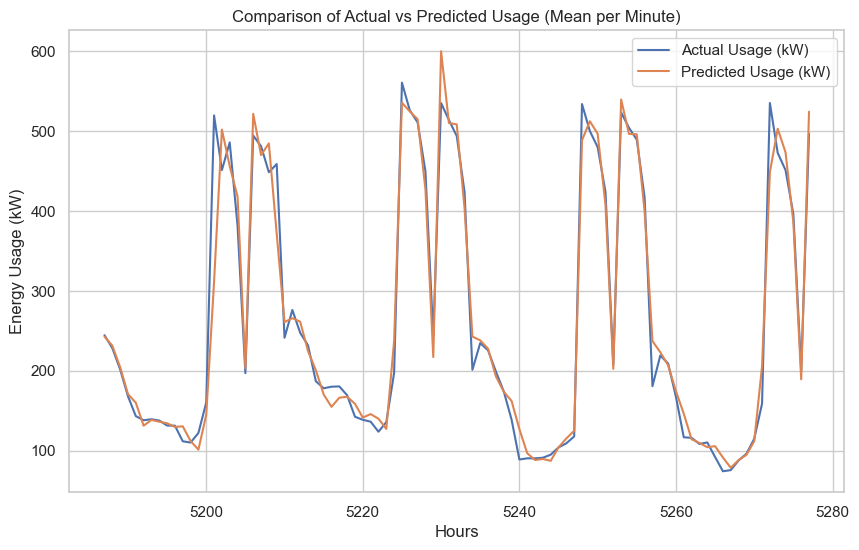

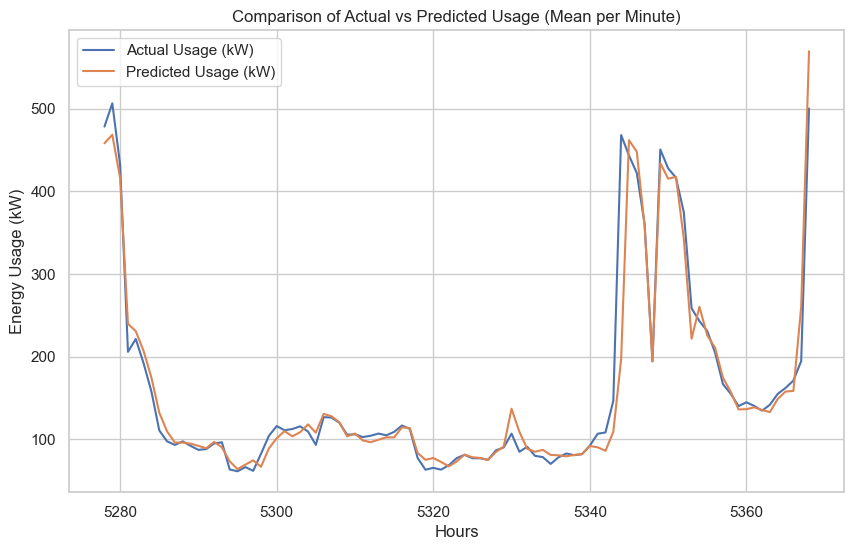

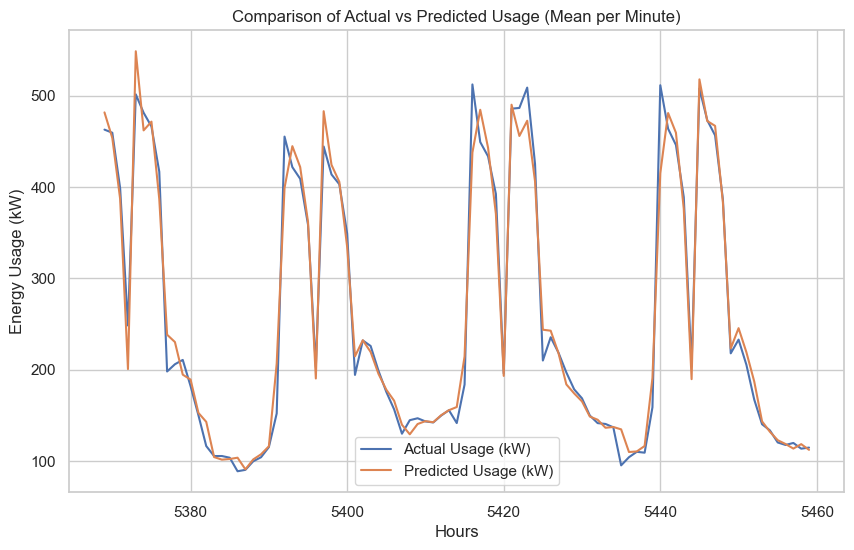

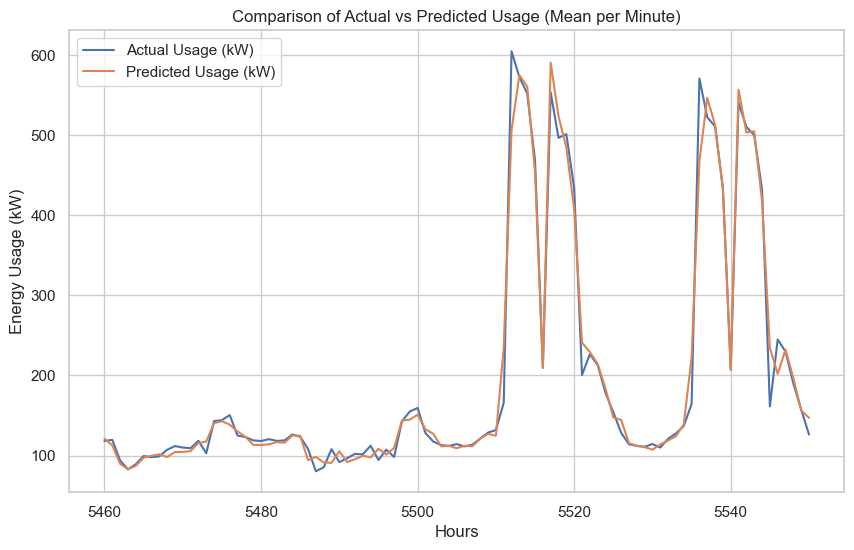

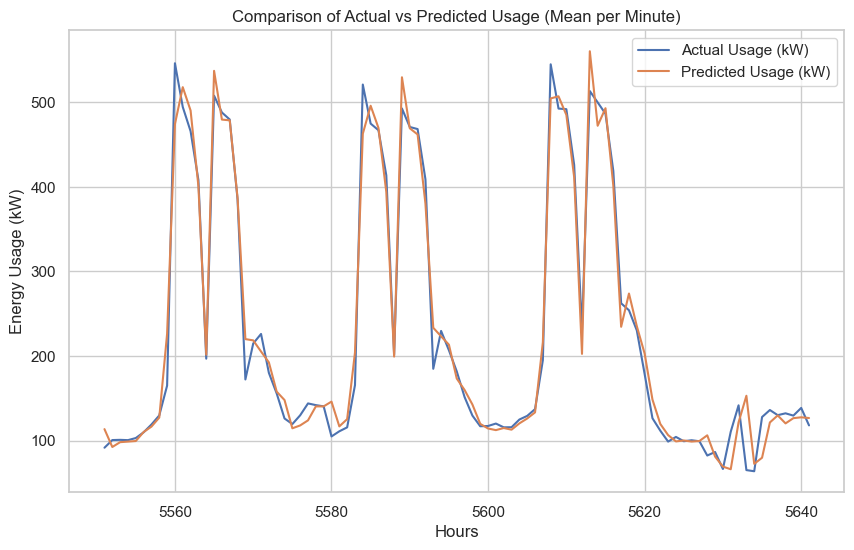

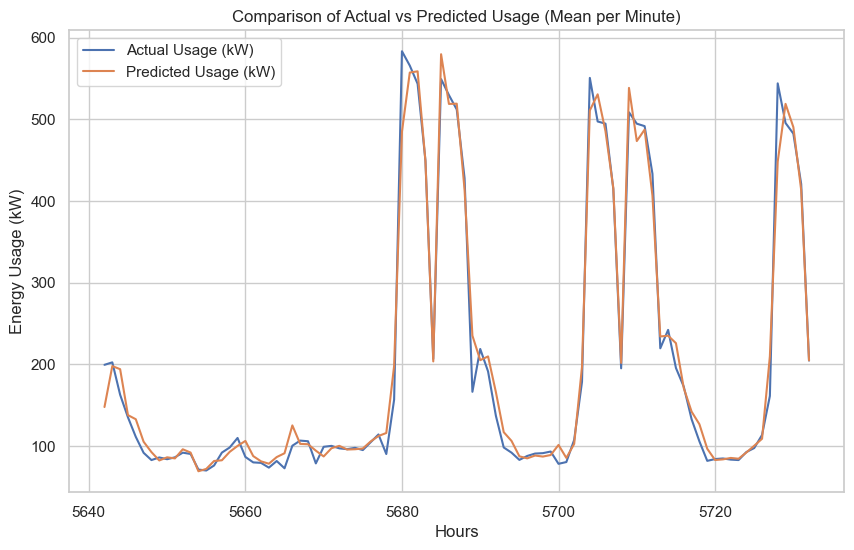

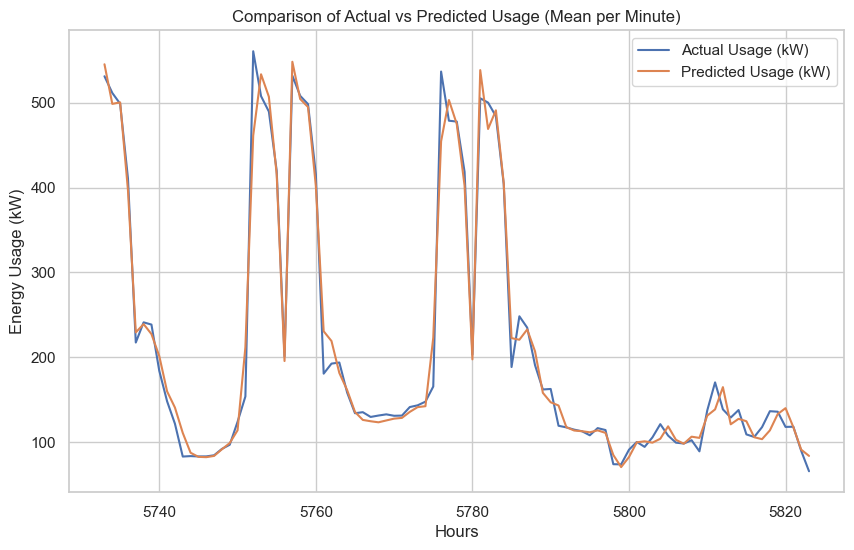

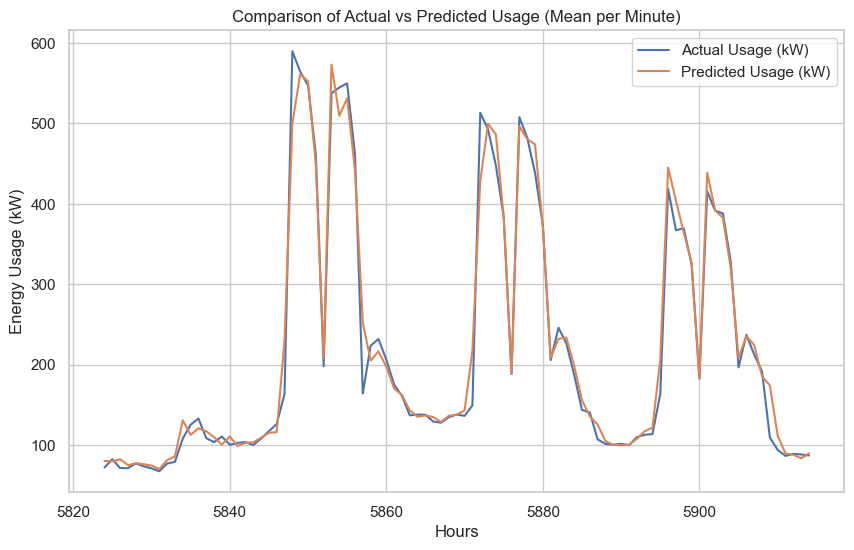

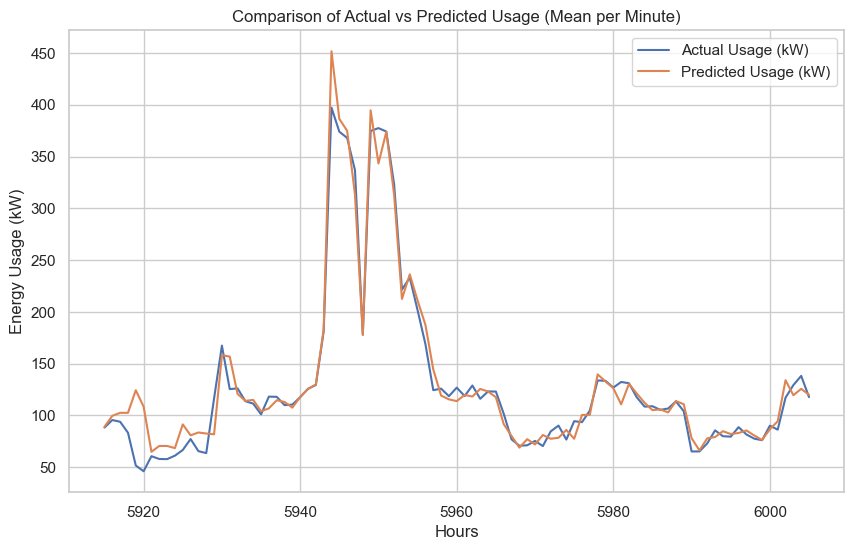

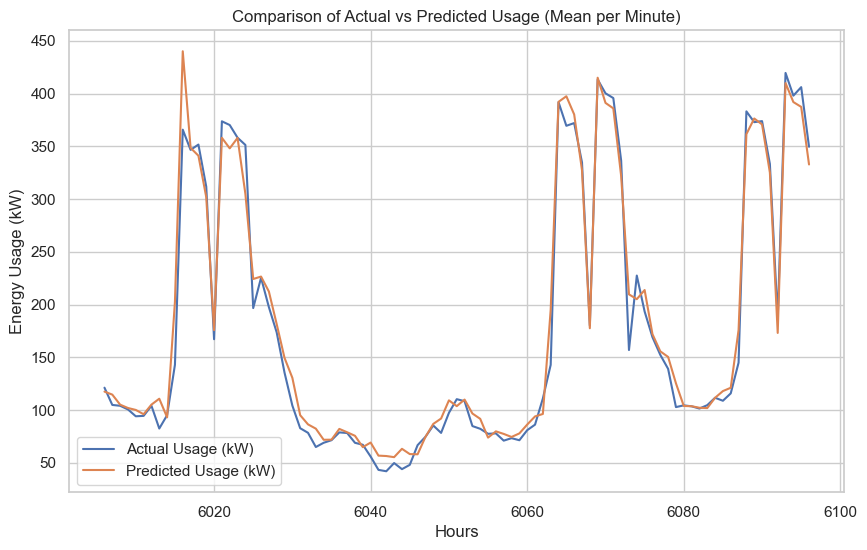

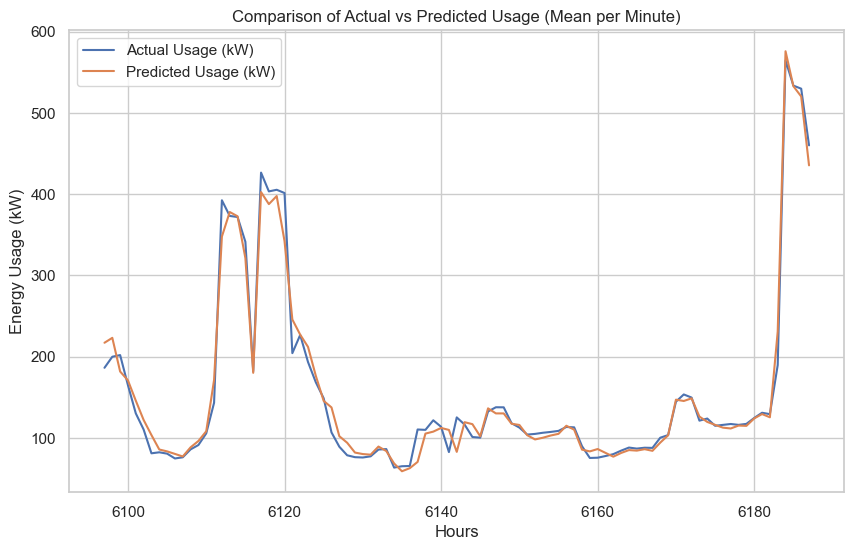

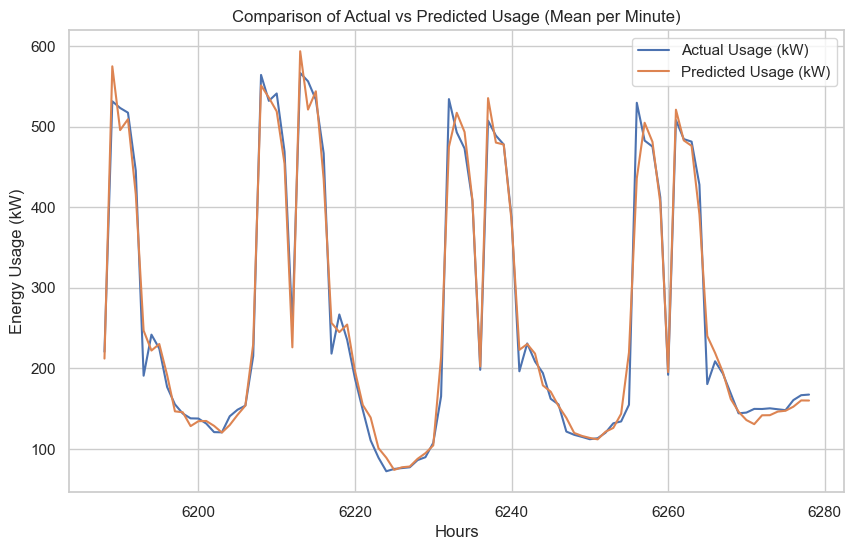

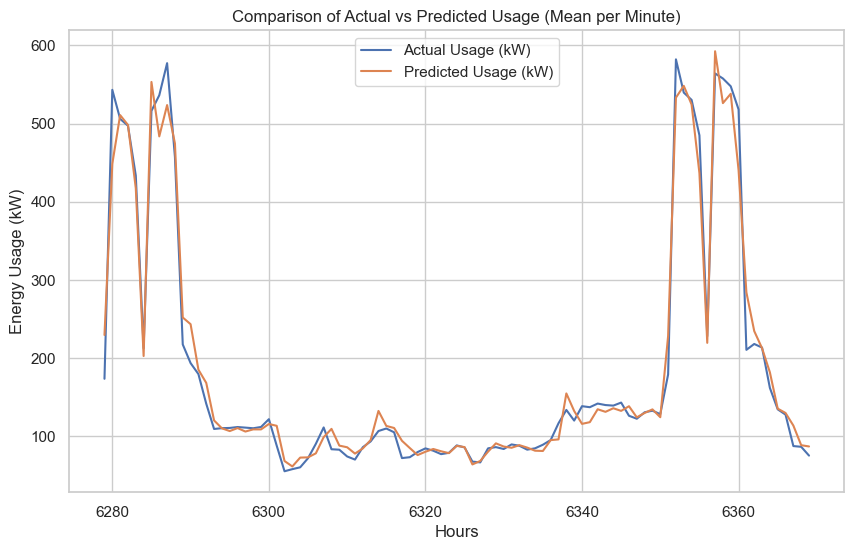

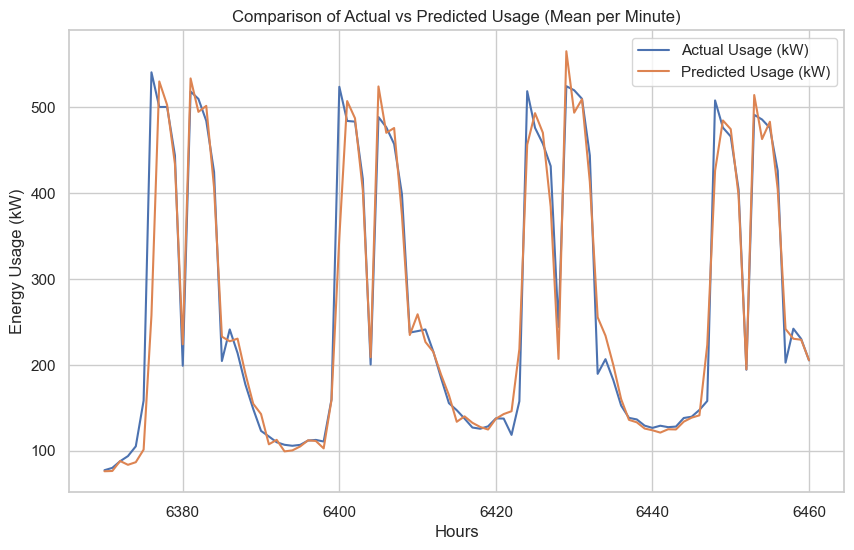

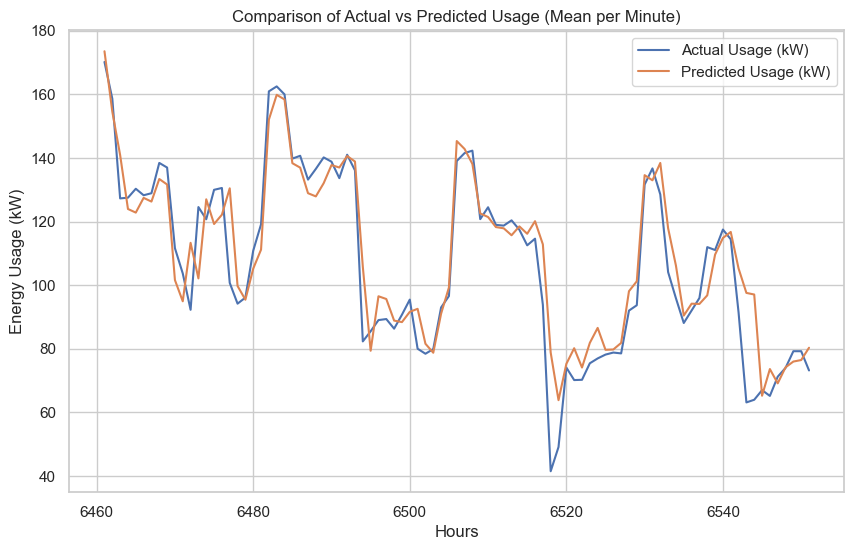

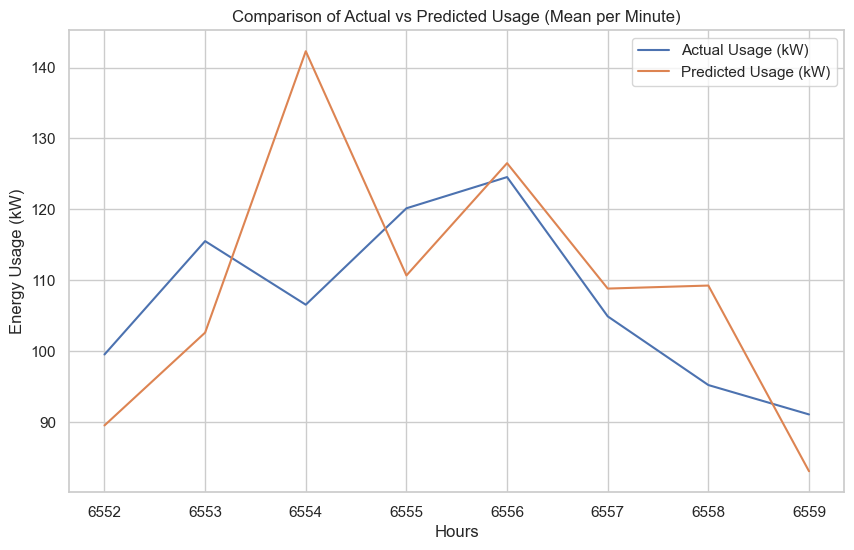

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设定 Seaborn 的风格
#sns.set(style="whitegrid")

d = int(len(y_pred_avg)/36/2)
for i in [i for i in range(len(y_pred_avg)) if i % d == 0]:
    plt.figure(figsize=(10, 6))  # 设置图表大小

    # 真实值
    sns.lineplot(data=combined_df[0]["y_true"][i:i+d], label="Actual Usage (kW)", linestyle='-')

    # 预测值
    sns.lineplot(data=y_pred_avg[i:i+d], label="Predicted Usage (kW)", linestyle='-')

    plt.title("Comparison of Actual vs Predicted Usage (Mean per Minute)")  # 标题
    plt.xlabel("Hours")  # X轴标签
    plt.ylabel("Energy Usage (kW)")  # Y轴标签
    plt.legend()  # 图例
    plt.savefig(f"{i}.png")
    plt.show()


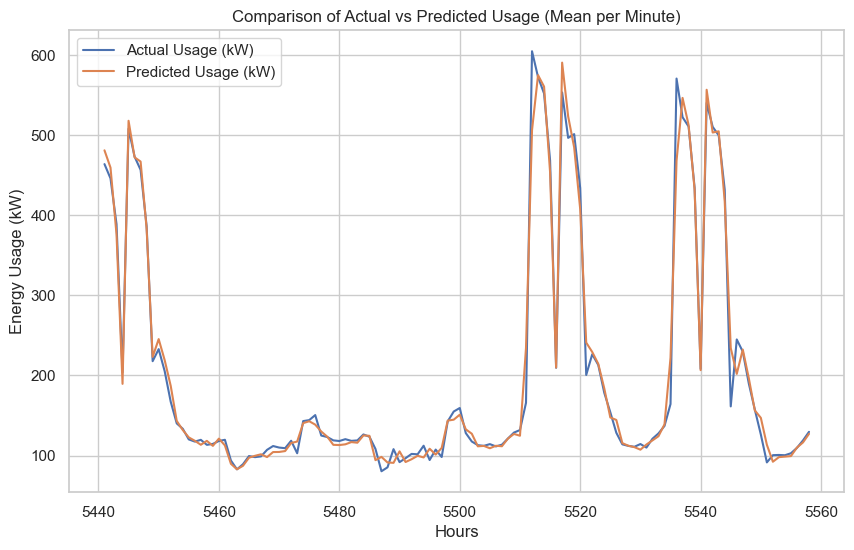

In [71]:
    plt.figure(figsize=(10, 6))  # 设置图表大小

    # 真实值
    sns.lineplot(data=combined_df[0]["y_true"][5441:5559], label="Actual Usage (kW)", linestyle='-')

    # 预测值
    sns.lineplot(data=y_pred_avg[5441:5559], label="Predicted Usage (kW)", linestyle='-')

    plt.title("Comparison of Actual vs Predicted Usage (Mean per Minute)")  # 标题
    plt.xlabel("Hours")  # X轴标签
    plt.ylabel("Energy Usage (kW)")  # Y轴标签
    plt.legend()  # 图例
    plt.savefig(f"{i}.png")
    plt.show()

In [72]:
calculate_rmse_mae(combined_df[0]["y_true"][-2*d:], y_pred_avg[-2*d:])

RMSE: 21.734346301226605
MAE: 11.959493062271061
R2: 0.9743137283340821


(11.959493062271061, 21.734346301226605, 0.9743137283340821)

In [110]:
plt.plot(combined_df["y_true"], label="Load")
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not str